In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Melbourne_housing_FULL1.csv')
data.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,num,ID
0,0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,...,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,1,1
1,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,1,2
2,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,1,3
3,3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,...,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,1,4
4,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,1,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     34857 non-null  int64  
 1   Suburb         34857 non-null  object 
 2   Address        34857 non-null  object 
 3   Rooms          34857 non-null  int64  
 4   Type           34857 non-null  object 
 5   Price          27247 non-null  float64
 6   Method         34857 non-null  object 
 7   SellerG        34857 non-null  object 
 8   Date           34857 non-null  object 
 9   Distance       34856 non-null  float64
 10  Postcode       34856 non-null  float64
 11  Bedroom2       26640 non-null  float64
 12  Bathroom       26631 non-null  float64
 13  Car            26129 non-null  float64
 14  Landsize       23047 non-null  float64
 15  BuildingArea   13742 non-null  float64
 16  YearBuilt      15551 non-null  float64
 17  CouncilArea    34854 non-null  object 
 18  Lattit

In [4]:
data.shape

(34857, 24)

In [5]:
data.isnull().sum()

Unnamed: 0           0
Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
num                  0
ID                   0
dtype: int64

In [6]:
data["Suburb"].nunique()

351

In [7]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()
data["u_suburb"]=labelencoder.fit_transform(data["Suburb"])
u_suburb=data[['u_suburb','Suburb']].drop_duplicates().sort_values(by='u_suburb')
u_suburb

,u_suburb,Suburb
0,0,Abbotsford
10990,1,Aberfeldie
66,2,Airport West
15397,3,Albanvale
133,4,Albert Park
...,...,...
10818,346,Yallambie
19248,347,Yarra Glen
10846,348,Yarraville
23088,349,croydon


In [8]:
data["u_Type"]=labelencoder.fit_transform(data['Type'])
u_Type=data[['u_Type','Type']].drop_duplicates().sort_values(by='u_Type')
u_Type

,u_Type,Type
0,0,h
16,1,t
3,2,u


In [9]:
data=data.drop('Type',axis=1)

In [10]:
data["Method"].unique()

array(['SS', 'S', 'VB', 'SP', 'PI', 'SN', 'W', 'PN', 'SA'], dtype=object)

In [11]:
data=data.drop('Method',axis=1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     34857 non-null  int64  
 1   Suburb         34857 non-null  object 
 2   Address        34857 non-null  object 
 3   Rooms          34857 non-null  int64  
 4   Price          27247 non-null  float64
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom2       26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13742 non-null  float64
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Lattitude      26881 non-null  float64
 17  Longtitude     26881 non-null  float64
 18  Region

In [13]:
data=data.drop('SellerG',axis=1)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     34857 non-null  int64  
 1   Suburb         34857 non-null  object 
 2   Address        34857 non-null  object 
 3   Rooms          34857 non-null  int64  
 4   Price          27247 non-null  float64
 5   Date           34857 non-null  object 
 6   Distance       34856 non-null  float64
 7   Postcode       34856 non-null  float64
 8   Bedroom2       26640 non-null  float64
 9   Bathroom       26631 non-null  float64
 10  Car            26129 non-null  float64
 11  Landsize       23047 non-null  float64
 12  BuildingArea   13742 non-null  float64
 13  YearBuilt      15551 non-null  float64
 14  CouncilArea    34854 non-null  object 
 15  Lattitude      26881 non-null  float64
 16  Longtitude     26881 non-null  float64
 17  Regionname     34854 non-null  object 
 18  Proper

In [15]:
data["CouncilArea"].isnull().sum()

3

In [16]:
data.loc[data["CouncilArea"].isnull()]

,Unnamed: 0,Suburb,Address,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,num,ID,u_suburb,u_Type
18523,18523,Footscray,2/16 Stafford St,2,710000.0,15/07/2017,5.1,3011.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,18524,140,2
26888,26888,Camberwell,2/3 Kingsley St,2,825000.0,11/11/2017,7.7,3124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,26889,62,0
29483,29483,Fawkner Lot,1/3 Brian St,3,616000.0,6/01/2018,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,29484,134,0


In [17]:
data=data.dropna(subset=['CouncilArea'],axis=0)

In [18]:
data.isnull().sum()

Unnamed: 0           0
Suburb               0
Address              0
Rooms                0
Price             7610
Date                 0
Distance             0
Postcode             0
Bedroom2          8214
Bathroom          8223
Car               8725
Landsize         11807
BuildingArea     21112
YearBuilt        19303
CouncilArea          0
Lattitude         7973
Longtitude        7973
Regionname           0
Propertycount        0
num                  0
ID                   0
u_suburb             0
u_Type               0
dtype: int64

In [19]:
data['u_CouncilArea']=labelencoder.fit_transform(data['CouncilArea'])
u_CouncilArea=data[['u_CouncilArea','CouncilArea']].drop_duplicates().sort_values(by='u_CouncilArea')
u_CouncilArea

,u_CouncilArea,CouncilArea
3714,0,Banyule City Council
1732,1,Bayside City Council
597,2,Boroondara City Council
5642,3,Brimbank City Council
14357,4,Cardinia Shire Council
14263,5,Casey City Council
194,6,Darebin City Council
14383,7,Frankston City Council
1209,8,Glen Eira City Council
14333,9,Greater Dandenong City Council


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34854 entries, 0 to 34856
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     34854 non-null  int64  
 1   Suburb         34854 non-null  object 
 2   Address        34854 non-null  object 
 3   Rooms          34854 non-null  int64  
 4   Price          27244 non-null  float64
 5   Date           34854 non-null  object 
 6   Distance       34854 non-null  float64
 7   Postcode       34854 non-null  float64
 8   Bedroom2       26640 non-null  float64
 9   Bathroom       26631 non-null  float64
 10  Car            26129 non-null  float64
 11  Landsize       23047 non-null  float64
 12  BuildingArea   13742 non-null  float64
 13  YearBuilt      15551 non-null  float64
 14  CouncilArea    34854 non-null  object 
 15  Lattitude      26881 non-null  float64
 16  Longtitude     26881 non-null  float64
 17  Regionname     34854 non-null  object 
 18  Proper

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34854 entries, 0 to 34856
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     34854 non-null  int64  
 1   Suburb         34854 non-null  object 
 2   Address        34854 non-null  object 
 3   Rooms          34854 non-null  int64  
 4   Price          27244 non-null  float64
 5   Date           34854 non-null  object 
 6   Distance       34854 non-null  float64
 7   Postcode       34854 non-null  float64
 8   Bedroom2       26640 non-null  float64
 9   Bathroom       26631 non-null  float64
 10  Car            26129 non-null  float64
 11  Landsize       23047 non-null  float64
 12  BuildingArea   13742 non-null  float64
 13  YearBuilt      15551 non-null  float64
 14  CouncilArea    34854 non-null  object 
 15  Lattitude      26881 non-null  float64
 16  Longtitude     26881 non-null  float64
 17  Regionname     34854 non-null  object 
 18  Proper

In [22]:
data["Regionname"].nunique()

8

In [23]:
data['u_Regionname']=labelencoder.fit_transform(data['Regionname'])
u_Regionname=data[['u_Regionname','Regionname']].drop_duplicates().sort_values(by='u_Regionname')
u_Regionname

,u_Regionname,Regionname
1628,0,Eastern Metropolitan
14263,1,Eastern Victoria
0,2,Northern Metropolitan
14337,3,Northern Victoria
7520,4,South-Eastern Metropolitan
133,5,Southern Metropolitan
66,6,Western Metropolitan
14488,7,Western Victoria


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34854 entries, 0 to 34856
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     34854 non-null  int64  
 1   Suburb         34854 non-null  object 
 2   Address        34854 non-null  object 
 3   Rooms          34854 non-null  int64  
 4   Price          27244 non-null  float64
 5   Date           34854 non-null  object 
 6   Distance       34854 non-null  float64
 7   Postcode       34854 non-null  float64
 8   Bedroom2       26640 non-null  float64
 9   Bathroom       26631 non-null  float64
 10  Car            26129 non-null  float64
 11  Landsize       23047 non-null  float64
 12  BuildingArea   13742 non-null  float64
 13  YearBuilt      15551 non-null  float64
 14  CouncilArea    34854 non-null  object 
 15  Lattitude      26881 non-null  float64
 16  Longtitude     26881 non-null  float64
 17  Regionname     34854 non-null  object 
 18  Proper

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34854 entries, 0 to 34856
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     34854 non-null  int64  
 1   Suburb         34854 non-null  object 
 2   Address        34854 non-null  object 
 3   Rooms          34854 non-null  int64  
 4   Price          27244 non-null  float64
 5   Date           34854 non-null  object 
 6   Distance       34854 non-null  float64
 7   Postcode       34854 non-null  float64
 8   Bedroom2       26640 non-null  float64
 9   Bathroom       26631 non-null  float64
 10  Car            26129 non-null  float64
 11  Landsize       23047 non-null  float64
 12  BuildingArea   13742 non-null  float64
 13  YearBuilt      15551 non-null  float64
 14  CouncilArea    34854 non-null  object 
 15  Lattitude      26881 non-null  float64
 16  Longtitude     26881 non-null  float64
 17  Regionname     34854 non-null  object 
 18  Proper

In [26]:
import datetime
data['Date']=pd.to_datetime(data['Date'],infer_datetime_format=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34854 entries, 0 to 34856
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     34854 non-null  int64         
 1   Suburb         34854 non-null  object        
 2   Address        34854 non-null  object        
 3   Rooms          34854 non-null  int64         
 4   Price          27244 non-null  float64       
 5   Date           34854 non-null  datetime64[ns]
 6   Distance       34854 non-null  float64       
 7   Postcode       34854 non-null  float64       
 8   Bedroom2       26640 non-null  float64       
 9   Bathroom       26631 non-null  float64       
 10  Car            26129 non-null  float64       
 11  Landsize       23047 non-null  float64       
 12  BuildingArea   13742 non-null  float64       
 13  YearBuilt      15551 non-null  float64       
 14  CouncilArea    34854 non-null  object        
 15  Lattitude      2688

In [28]:
data=data.drop(['Lattitude','Longtitude','YearBuilt'],axis=1)

In [29]:
prd_building=data.dropna(axis=0)

In [30]:
X_train=prd_building.drop(['BuildingArea','Date','Price','Bedroom2','Bathroom','Car','Landsize','Suburb','Address','CouncilArea','Regionname'],axis=1)
X_train

,Unnamed: 0,Rooms,Distance,Postcode,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
2,2,2,2.5,3067.0,4019.0,1,3,0,0,31,2
4,4,3,2.5,3067.0,4019.0,1,5,0,0,31,2
6,6,4,2.5,3067.0,4019.0,1,7,0,0,31,2
11,11,3,2.5,3067.0,4019.0,1,12,0,0,31,2
14,14,2,2.5,3067.0,4019.0,1,15,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...
34847,34847,3,25.5,3750.0,2940.0,1,34848,343,0,29,2
34849,34849,3,25.5,3750.0,2940.0,1,34850,343,0,29,2
34853,34853,2,6.3,3013.0,6543.0,1,34854,348,0,16,6
34854,34854,2,6.3,3013.0,6543.0,1,34855,348,1,16,6


In [31]:
y_train=prd_building['BuildingArea']

In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
prd_buildingna=data[data['BuildingArea'].isna()]
prd_buildingna=prd_buildingna.drop(['Date','Price','Bedroom2','Bathroom','Car','Landsize','BuildingArea'],axis=1)
prd_buildingna

,Unnamed: 0,Suburb,Address,Rooms,Distance,Postcode,CouncilArea,Regionname,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
0,0,Abbotsford,68 Studley St,2,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0,1,1,0,0,31,2
1,1,Abbotsford,85 Turner St,2,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0,1,2,0,0,31,2
3,3,Abbotsford,18/659 Victoria St,3,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0,1,4,0,2,31,2
5,5,Abbotsford,40 Federation La,3,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0,1,6,0,0,31,2
8,8,Abbotsford,53 Turner St,2,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0,1,9,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34846,34846,Wollert,10 Alma Rd,4,25.5,3750.0,Whittlesea City Council,Northern Metropolitan,2940.0,1,34847,343,0,29,2
34848,34848,Wollert,16 Gunther Wy,4,25.5,3750.0,Whittlesea City Council,Northern Metropolitan,2940.0,1,34849,343,0,29,2
34851,34851,Yarraville,78 Bayview Rd,3,6.3,3013.0,Maribyrnong City Council,Western Metropolitan,6543.0,1,34852,348,0,16,6
34852,34852,Yarraville,13 Burns St,4,6.3,3013.0,Maribyrnong City Council,Western Metropolitan,6543.0,1,34853,348,0,16,6


In [34]:
X_test=prd_buildingna.drop(['Suburb','Address','CouncilArea','Regionname'],axis=1)

In [35]:
X_test.isnull().sum()

Unnamed: 0       0
Rooms            0
Distance         0
Postcode         0
Propertycount    0
num              0
ID               0
u_suburb         0
u_Type           0
u_CouncilArea    0
u_Regionname     0
dtype: int64

In [36]:
y_pred=lr.predict(X_test)
y_pred

array([ 71.30612302,  71.30517077, 137.72561026, ..., 115.33197522,
       176.53510022, 115.33197522])

In [37]:
prd_buildingna['U_buildingarea']=y_pred

In [38]:
data=data.merge(prd_buildingna,how='left',on=['ID'])

In [39]:
data.isnull().sum()

Unnamed: 0_x           0
Suburb_x               0
Address_x              0
Rooms_x                0
Price               7610
Date                   0
Distance_x             0
Postcode_x             0
Bedroom2            8214
Bathroom            8223
Car                 8725
Landsize           11807
BuildingArea       21112
CouncilArea_x          0
Regionname_x           0
Propertycount_x        0
num_x                  0
ID                     0
u_suburb_x             0
u_Type_x               0
u_CouncilArea_x        0
u_Regionname_x         0
Unnamed: 0_y       13742
Suburb_y           13742
Address_y          13742
Rooms_y            13742
Distance_y         13742
Postcode_y         13742
CouncilArea_y      13742
Regionname_y       13742
Propertycount_y    13742
num_y              13742
u_suburb_y         13742
u_Type_y           13742
u_CouncilArea_y    13742
u_Regionname_y     13742
U_buildingarea     13742
dtype: int64

In [40]:
data=data.drop(['Unnamed: 0_y','Suburb_y','Address_y','CouncilArea_y','Regionname_y','Rooms_y','Distance_y','Postcode_y','Propertycount_y','num_y','u_suburb_y','u_Type_y','u_CouncilArea_y','u_Regionname_y'],axis=1)

In [41]:
data.isnull().sum()

Unnamed: 0_x           0
Suburb_x               0
Address_x              0
Rooms_x                0
Price               7610
Date                   0
Distance_x             0
Postcode_x             0
Bedroom2            8214
Bathroom            8223
Car                 8725
Landsize           11807
BuildingArea       21112
CouncilArea_x          0
Regionname_x           0
Propertycount_x        0
num_x                  0
ID                     0
u_suburb_x             0
u_Type_x               0
u_CouncilArea_x        0
u_Regionname_x         0
U_buildingarea     13742
dtype: int64

In [42]:
data['BuildingArea']=data['BuildingArea'].fillna(0)+data['U_buildingarea'].fillna(0)

In [43]:
data=data.drop('U_buildingarea',axis=1)

In [44]:
data.isnull().sum()

Unnamed: 0_x           0
Suburb_x               0
Address_x              0
Rooms_x                0
Price               7610
Date                   0
Distance_x             0
Postcode_x             0
Bedroom2            8214
Bathroom            8223
Car                 8725
Landsize           11807
BuildingArea           0
CouncilArea_x          0
Regionname_x           0
Propertycount_x        0
num_x                  0
ID                     0
u_suburb_x             0
u_Type_x               0
u_CouncilArea_x        0
u_Regionname_x         0
dtype: int64

In [45]:
data['Unnamed: 0_x']=data['ID']

In [46]:
prd_Landsize=data.dropna(axis=0)

In [47]:
prd_Landsize=prd_Landsize.drop(['Price','Bedroom2','Bathroom','Car'],axis=1)

In [48]:
prd_Landsize.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17701 entries, 1 to 34853
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0_x     17701 non-null  int64         
 1   Suburb_x         17701 non-null  object        
 2   Address_x        17701 non-null  object        
 3   Rooms_x          17701 non-null  int64         
 4   Date             17701 non-null  datetime64[ns]
 5   Distance_x       17701 non-null  float64       
 6   Postcode_x       17701 non-null  float64       
 7   Landsize         17701 non-null  float64       
 8   BuildingArea     17701 non-null  float64       
 9   CouncilArea_x    17701 non-null  object        
 10  Regionname_x     17701 non-null  object        
 11  Propertycount_x  17701 non-null  float64       
 12  num_x            17701 non-null  int64         
 13  ID               17701 non-null  int64         
 14  u_suburb_x       17701 non-null  int64

In [49]:
X_train=prd_Landsize.drop(['Landsize','Date','Suburb_x','Address_x','CouncilArea_x','Regionname_x'],axis=1)
X_train.isnull().sum()

Unnamed: 0_x       0
Rooms_x            0
Distance_x         0
Postcode_x         0
BuildingArea       0
Propertycount_x    0
num_x              0
ID                 0
u_suburb_x         0
u_Type_x           0
u_CouncilArea_x    0
u_Regionname_x     0
dtype: int64

In [50]:
y_train=prd_Landsize['Landsize']
y_train

1        202.0
2        156.0
4        134.0
5         94.0
6        120.0
         ...  
34846    404.0
34849    593.0
34850     98.0
34851    220.0
34853    250.0
Name: Landsize, Length: 17701, dtype: float64

In [51]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
prd_landsize_na=data[data['Landsize'].isna()]
prd_landsize_na.isnull().sum()

Unnamed: 0_x           0
Suburb_x               0
Address_x              0
Rooms_x                0
Price               2545
Date                   0
Distance_x             0
Postcode_x             0
Bedroom2            8207
Bathroom            8211
Car                 8349
Landsize           11807
BuildingArea           0
CouncilArea_x          0
Regionname_x           0
Propertycount_x        0
num_x                  0
ID                     0
u_suburb_x             0
u_Type_x               0
u_CouncilArea_x        0
u_Regionname_x         0
dtype: int64

In [53]:
prd_landsize_na=prd_landsize_na.drop(['Price','Bedroom2','Bathroom','Car','Date','Landsize'],axis=1)

In [54]:
x_test=prd_landsize_na.drop(['Suburb_x','Address_x','CouncilArea_x','Regionname_x'],axis=1)
x_test

,Unnamed: 0_x,Rooms_x,Distance_x,Postcode_x,BuildingArea,Propertycount_x,num_x,ID,u_suburb_x,u_Type_x,u_CouncilArea_x,u_Regionname_x
15,16,3,2.5,3067.0,132.503301,4019.0,1,16,0,0,31,2
16,17,2,2.5,3067.0,73.896330,4019.0,1,17,0,1,31,2
19,20,2,2.5,3067.0,76.498908,4019.0,1,20,0,2,31,2
21,22,2,2.5,3067.0,76.497008,4019.0,1,22,0,2,31,2
22,23,1,2.5,3067.0,15.284598,4019.0,1,23,0,2,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...
34835,34839,2,6.8,3016.0,62.172936,6380.0,1,34839,340,2,10,6
34836,34840,2,6.8,3016.0,62.172936,6380.0,1,34840,340,2,10,6
34837,34841,2,6.8,3016.0,62.172936,6380.0,1,34841,340,2,10,6
34841,34845,1,4.6,3181.0,4.442676,4380.0,1,34845,342,2,26,5


In [55]:
y_pred=lr.predict(x_test)
y_pred

array([498.20958186, 423.8549581 , 435.98184068, ..., 365.95676094,
       448.59332163, 444.56415776])

In [56]:
prd_landsize_na['U_landsize']=y_pred

In [57]:
prd_landsize_na.isnull().sum()

Unnamed: 0_x       0
Suburb_x           0
Address_x          0
Rooms_x            0
Distance_x         0
Postcode_x         0
BuildingArea       0
CouncilArea_x      0
Regionname_x       0
Propertycount_x    0
num_x              0
ID                 0
u_suburb_x         0
u_Type_x           0
u_CouncilArea_x    0
u_Regionname_x     0
U_landsize         0
dtype: int64

In [58]:
data=data.merge(prd_landsize_na,how='left',on=['ID'])

In [59]:
data.isnull().sum()

Unnamed: 0_x_x           0
Suburb_x_x               0
Address_x_x              0
Rooms_x_x                0
Price                 7610
Date                     0
Distance_x_x             0
Postcode_x_x             0
Bedroom2              8214
Bathroom              8223
Car                   8725
Landsize             11807
BuildingArea_x           0
CouncilArea_x_x          0
Regionname_x_x           0
Propertycount_x_x        0
num_x_x                  0
ID                       0
u_suburb_x_x             0
u_Type_x_x               0
u_CouncilArea_x_x        0
u_Regionname_x_x         0
Unnamed: 0_x_y       23047
Suburb_x_y           23047
Address_x_y          23047
Rooms_x_y            23047
Distance_x_y         23047
Postcode_x_y         23047
BuildingArea_y       23047
CouncilArea_x_y      23047
Regionname_x_y       23047
Propertycount_x_y    23047
num_x_y              23047
u_suburb_x_y         23047
u_Type_x_y           23047
u_CouncilArea_x_y    23047
u_Regionname_x_y     23047
U

In [60]:
data=data.drop(['Unnamed: 0_x_y','Rooms_x_y','Distance_x_y','Postcode_x_y','BuildingArea_y','Propertycount_x_y','num_x_y','u_suburb_x_y','u_Type_x_y','u_CouncilArea_x_y','u_Regionname_x_y','Suburb_x_y','Address_x_y','CouncilArea_x_y','Regionname_x_y'],axis=1)

In [61]:
data.isnull().sum()

Unnamed: 0_x_x           0
Suburb_x_x               0
Address_x_x              0
Rooms_x_x                0
Price                 7610
Date                     0
Distance_x_x             0
Postcode_x_x             0
Bedroom2              8214
Bathroom              8223
Car                   8725
Landsize             11807
BuildingArea_x           0
CouncilArea_x_x          0
Regionname_x_x           0
Propertycount_x_x        0
num_x_x                  0
ID                       0
u_suburb_x_x             0
u_Type_x_x               0
u_CouncilArea_x_x        0
u_Regionname_x_x         0
U_landsize           23047
dtype: int64

In [62]:
data['Landsize']=data['Landsize'].fillna(0)+data['U_landsize'].fillna(0)

In [63]:
data=data.drop('U_landsize',axis=1)

In [64]:
prd_bathroom=data.dropna(axis=0)
prd_bathroom.isnull().sum()

Unnamed: 0_x_x       0
Suburb_x_x           0
Address_x_x          0
Rooms_x_x            0
Price                0
Date                 0
Distance_x_x         0
Postcode_x_x         0
Bedroom2             0
Bathroom             0
Car                  0
Landsize             0
BuildingArea_x       0
CouncilArea_x_x      0
Regionname_x_x       0
Propertycount_x_x    0
num_x_x              0
ID                   0
u_suburb_x_x         0
u_Type_x_x           0
u_CouncilArea_x_x    0
u_Regionname_x_x     0
dtype: int64

In [65]:
X_train=prd_bathroom.drop(['Date','Price','Bedroom2','Bathroom','Car','Suburb_x_x','Address_x_x','CouncilArea_x_x','Regionname_x_x'],axis=1)
X_train.isnull().sum()

Unnamed: 0_x_x       0
Rooms_x_x            0
Distance_x_x         0
Postcode_x_x         0
Landsize             0
BuildingArea_x       0
Propertycount_x_x    0
num_x_x              0
ID                   0
u_suburb_x_x         0
u_Type_x_x           0
u_CouncilArea_x_x    0
u_Regionname_x_x     0
dtype: int64

In [66]:
y_train=prd_bathroom['Bathroom']

In [67]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [68]:
prd_bathroom_na=data[data['Bathroom'].isna()]

In [69]:
prd_bathroom_na.isnull().sum()

Unnamed: 0_x_x          0
Suburb_x_x              0
Address_x_x             0
Rooms_x_x               0
Price                1779
Date                    0
Distance_x_x            0
Postcode_x_x            0
Bedroom2             8214
Bathroom             8223
Car                  8223
Landsize                0
BuildingArea_x          0
CouncilArea_x_x         0
Regionname_x_x          0
Propertycount_x_x       0
num_x_x                 0
ID                      0
u_suburb_x_x            0
u_Type_x_x              0
u_CouncilArea_x_x       0
u_Regionname_x_x        0
dtype: int64

In [70]:
prd_bathroom_na=prd_bathroom_na.drop(['Price','Bedroom2','Bathroom','Car','Date','Suburb_x_x','Address_x_x','CouncilArea_x_x','Regionname_x_x'],axis=1)


In [71]:
prd_bathroom_na.isnull().sum()

Unnamed: 0_x_x       0
Rooms_x_x            0
Distance_x_x         0
Postcode_x_x         0
Landsize             0
BuildingArea_x       0
Propertycount_x_x    0
num_x_x              0
ID                   0
u_suburb_x_x         0
u_Type_x_x           0
u_CouncilArea_x_x    0
u_Regionname_x_x     0
dtype: int64

In [72]:
x_test=prd_bathroom_na

In [73]:
y_pred=lr.predict(x_test)
y_pred

array([1.54087344, 1.15019743, 1.26780474, ..., 1.24569973, 0.85765099,
       1.52001265])

In [74]:
prd_bathroom_na['prd_bathroom_na']=np.round(y_pred)

In [75]:
data=data.merge(prd_bathroom_na,how='left',on=['ID'])

In [76]:
data.isnull().sum()

Unnamed: 0_x_x_x           0
Suburb_x_x                 0
Address_x_x                0
Rooms_x_x_x                0
Price                   7610
Date                       0
Distance_x_x_x             0
Postcode_x_x_x             0
Bedroom2                8214
Bathroom                8223
Car                     8725
Landsize_x                 0
BuildingArea_x_x           0
CouncilArea_x_x            0
Regionname_x_x             0
Propertycount_x_x_x        0
num_x_x_x                  0
ID                         0
u_suburb_x_x_x             0
u_Type_x_x_x               0
u_CouncilArea_x_x_x        0
u_Regionname_x_x_x         0
Unnamed: 0_x_x_y       26631
Rooms_x_x_y            26631
Distance_x_x_y         26631
Postcode_x_x_y         26631
Landsize_y             26631
BuildingArea_x_y       26631
Propertycount_x_x_y    26631
num_x_x_y              26631
u_suburb_x_x_y         26631
u_Type_x_x_y           26631
u_CouncilArea_x_x_y    26631
u_Regionname_x_x_y     26631
prd_bathroom_n

In [77]:
data=data.drop(['Unnamed: 0_x_x_y','Rooms_x_x_y','Distance_x_x_y','Postcode_x_x_y','Landsize_y','BuildingArea_x_y','Propertycount_x_x_y','num_x_x_y','u_suburb_x_x_y','u_Type_x_x_y','u_CouncilArea_x_x_y','u_Regionname_x_x_y'],axis=1)

In [78]:
data.isnull().sum()

Unnamed: 0_x_x_x           0
Suburb_x_x                 0
Address_x_x                0
Rooms_x_x_x                0
Price                   7610
Date                       0
Distance_x_x_x             0
Postcode_x_x_x             0
Bedroom2                8214
Bathroom                8223
Car                     8725
Landsize_x                 0
BuildingArea_x_x           0
CouncilArea_x_x            0
Regionname_x_x             0
Propertycount_x_x_x        0
num_x_x_x                  0
ID                         0
u_suburb_x_x_x             0
u_Type_x_x_x               0
u_CouncilArea_x_x_x        0
u_Regionname_x_x_x         0
prd_bathroom_na        26631
dtype: int64

In [79]:
data['Bathroom']=data['Bathroom'].fillna(0)+data['prd_bathroom_na'].fillna(0)

In [80]:
data.isnull().sum()

Unnamed: 0_x_x_x           0
Suburb_x_x                 0
Address_x_x                0
Rooms_x_x_x                0
Price                   7610
Date                       0
Distance_x_x_x             0
Postcode_x_x_x             0
Bedroom2                8214
Bathroom                   0
Car                     8725
Landsize_x                 0
BuildingArea_x_x           0
CouncilArea_x_x            0
Regionname_x_x             0
Propertycount_x_x_x        0
num_x_x_x                  0
ID                         0
u_suburb_x_x_x             0
u_Type_x_x_x               0
u_CouncilArea_x_x_x        0
u_Regionname_x_x_x         0
prd_bathroom_na        26631
dtype: int64

In [81]:
data=data.drop('prd_bathroom_na',axis=1)

In [82]:
data.isnull().sum()

Unnamed: 0_x_x_x          0
Suburb_x_x                0
Address_x_x               0
Rooms_x_x_x               0
Price                  7610
Date                      0
Distance_x_x_x            0
Postcode_x_x_x            0
Bedroom2               8214
Bathroom                  0
Car                    8725
Landsize_x                0
BuildingArea_x_x          0
CouncilArea_x_x           0
Regionname_x_x            0
Propertycount_x_x_x       0
num_x_x_x                 0
ID                        0
u_suburb_x_x_x            0
u_Type_x_x_x              0
u_CouncilArea_x_x_x       0
u_Regionname_x_x_x        0
dtype: int64

In [83]:
prd_bedroom=data.dropna(axis=0)


In [84]:
prd_bedroom.isnull().sum()

Unnamed: 0_x_x_x       0
Suburb_x_x             0
Address_x_x            0
Rooms_x_x_x            0
Price                  0
Date                   0
Distance_x_x_x         0
Postcode_x_x_x         0
Bedroom2               0
Bathroom               0
Car                    0
Landsize_x             0
BuildingArea_x_x       0
CouncilArea_x_x        0
Regionname_x_x         0
Propertycount_x_x_x    0
num_x_x_x              0
ID                     0
u_suburb_x_x_x         0
u_Type_x_x_x           0
u_CouncilArea_x_x_x    0
u_Regionname_x_x_x     0
dtype: int64

In [85]:
X_train=prd_bedroom.drop(['Price','Bedroom2','Car','Date','Suburb_x_x','Address_x_x','CouncilArea_x_x','Regionname_x_x'],axis=1)

In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20423 entries, 1 to 34853
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0_x_x_x     20423 non-null  int64  
 1   Rooms_x_x_x          20423 non-null  int64  
 2   Distance_x_x_x       20423 non-null  float64
 3   Postcode_x_x_x       20423 non-null  float64
 4   Bathroom             20423 non-null  float64
 5   Landsize_x           20423 non-null  float64
 6   BuildingArea_x_x     20423 non-null  float64
 7   Propertycount_x_x_x  20423 non-null  float64
 8   num_x_x_x            20423 non-null  int64  
 9   ID                   20423 non-null  int64  
 10  u_suburb_x_x_x       20423 non-null  int64  
 11  u_Type_x_x_x         20423 non-null  int64  
 12  u_CouncilArea_x_x_x  20423 non-null  int64  
 13  u_Regionname_x_x_x   20423 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 2.3 MB


In [87]:
y_train=prd_bedroom['Bedroom2']

In [88]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [89]:
prd_bedroom_na=data[data['Bedroom2'].isna()]

In [90]:
prd_bedroom_na.isnull().sum()

Unnamed: 0_x_x_x          0
Suburb_x_x                0
Address_x_x               0
Rooms_x_x_x               0
Price                  1776
Date                      0
Distance_x_x_x            0
Postcode_x_x_x            0
Bedroom2               8214
Bathroom                  0
Car                    8214
Landsize_x                0
BuildingArea_x_x          0
CouncilArea_x_x           0
Regionname_x_x            0
Propertycount_x_x_x       0
num_x_x_x                 0
ID                        0
u_suburb_x_x_x            0
u_Type_x_x_x              0
u_CouncilArea_x_x_x       0
u_Regionname_x_x_x        0
dtype: int64

In [91]:
prd_bedroom_na=prd_bedroom_na.drop(['Price','Bedroom2','Car','Date','Suburb_x_x','Address_x_x','CouncilArea_x_x','Regionname_x_x'],axis=1)

In [92]:
x_test=prd_bedroom_na

In [93]:
y_pred=lr.predict(x_test)
y_pred

array([2.98220268, 1.98481131, 1.9721521 , ..., 2.02741508, 1.09313962,
       3.03639255])

In [94]:
prd_bedroom_na['u_bedroom']=np.round(y_pred)

In [95]:
data=data.merge(prd_bedroom_na,how='left',on=['ID'])

In [96]:
data.isnull().sum()

Unnamed: 0_x_x_x_x           0
Suburb_x_x                   0
Address_x_x                  0
Rooms_x_x_x_x                0
Price                     7610
Date                         0
Distance_x_x_x_x             0
Postcode_x_x_x_x             0
Bedroom2                  8214
Bathroom_x                   0
Car                       8725
Landsize_x_x                 0
BuildingArea_x_x_x           0
CouncilArea_x_x              0
Regionname_x_x               0
Propertycount_x_x_x_x        0
num_x_x_x_x                  0
ID                           0
u_suburb_x_x_x_x             0
u_Type_x_x_x_x               0
u_CouncilArea_x_x_x_x        0
u_Regionname_x_x_x_x         0
Unnamed: 0_x_x_x_y       26640
Rooms_x_x_x_y            26640
Distance_x_x_x_y         26640
Postcode_x_x_x_y         26640
Bathroom_y               26640
Landsize_x_y             26640
BuildingArea_x_x_y       26640
Propertycount_x_x_x_y    26640
num_x_x_x_y              26640
u_suburb_x_x_x_y         26640
u_Type_x

In [97]:
data=data.drop(['Unnamed: 0_x_x_x_y','Rooms_x_x_x_y','Distance_x_x_x_y','Postcode_x_x_x_y','Bathroom_y','Landsize_x_y','BuildingArea_x_x_y','Propertycount_x_x_x_y','num_x_x_x_y','u_suburb_x_x_x_y','u_Type_x_x_x_y','u_CouncilArea_x_x_x_y','u_Regionname_x_x_x_y'],axis=1)

In [98]:
data.shape

(34854, 23)

In [99]:
data['Bedroom2']=data['Bedroom2'].fillna(0)+data['u_bedroom'].fillna(0)

In [100]:
data.isnull().sum()

Unnamed: 0_x_x_x_x           0
Suburb_x_x                   0
Address_x_x                  0
Rooms_x_x_x_x                0
Price                     7610
Date                         0
Distance_x_x_x_x             0
Postcode_x_x_x_x             0
Bedroom2                     0
Bathroom_x                   0
Car                       8725
Landsize_x_x                 0
BuildingArea_x_x_x           0
CouncilArea_x_x              0
Regionname_x_x               0
Propertycount_x_x_x_x        0
num_x_x_x_x                  0
ID                           0
u_suburb_x_x_x_x             0
u_Type_x_x_x_x               0
u_CouncilArea_x_x_x_x        0
u_Regionname_x_x_x_x         0
u_bedroom                26640
dtype: int64

In [101]:
data=data.drop('u_bedroom',axis=1)

In [102]:
data.isnull().sum()

Unnamed: 0_x_x_x_x          0
Suburb_x_x                  0
Address_x_x                 0
Rooms_x_x_x_x               0
Price                    7610
Date                        0
Distance_x_x_x_x            0
Postcode_x_x_x_x            0
Bedroom2                    0
Bathroom_x                  0
Car                      8725
Landsize_x_x                0
BuildingArea_x_x_x          0
CouncilArea_x_x             0
Regionname_x_x              0
Propertycount_x_x_x_x       0
num_x_x_x_x                 0
ID                          0
u_suburb_x_x_x_x            0
u_Type_x_x_x_x              0
u_CouncilArea_x_x_x_x       0
u_Regionname_x_x_x_x        0
dtype: int64

In [103]:
u_car=data.dropna(axis=0)

In [104]:
x_train=u_car.drop(['Price','Date','Car','Suburb_x_x','Address_x_x','CouncilArea_x_x','Regionname_x_x'],axis=1)

In [105]:
x_train.isnull().sum()

Unnamed: 0_x_x_x_x       0
Rooms_x_x_x_x            0
Distance_x_x_x_x         0
Postcode_x_x_x_x         0
Bedroom2                 0
Bathroom_x               0
Landsize_x_x             0
BuildingArea_x_x_x       0
Propertycount_x_x_x_x    0
num_x_x_x_x              0
ID                       0
u_suburb_x_x_x_x         0
u_Type_x_x_x_x           0
u_CouncilArea_x_x_x_x    0
u_Regionname_x_x_x_x     0
dtype: int64

In [106]:
y_train=u_car['Car']

In [107]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [108]:
U_car_prd=data[data['Car'].isna()]

In [109]:
U_car_prd=U_car_prd.drop(['Price','Date','Car','Suburb_x_x','Address_x_x','CouncilArea_x_x','Regionname_x_x'],axis=1)


In [110]:
U_car_prd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8725 entries, 15 to 34852
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0_x_x_x_x     8725 non-null   int64  
 1   Rooms_x_x_x_x          8725 non-null   int64  
 2   Distance_x_x_x_x       8725 non-null   float64
 3   Postcode_x_x_x_x       8725 non-null   float64
 4   Bedroom2               8725 non-null   float64
 5   Bathroom_x             8725 non-null   float64
 6   Landsize_x_x           8725 non-null   float64
 7   BuildingArea_x_x_x     8725 non-null   float64
 8   Propertycount_x_x_x_x  8725 non-null   float64
 9   num_x_x_x_x            8725 non-null   int64  
 10  ID                     8725 non-null   int64  
 11  u_suburb_x_x_x_x       8725 non-null   int64  
 12  u_Type_x_x_x_x         8725 non-null   int64  
 13  u_CouncilArea_x_x_x_x  8725 non-null   int64  
 14  u_Regionname_x_x_x_x   8725 non-null   int64  
dtypes:

In [111]:
x_test=U_car_prd

In [112]:
x_test.isnull().sum()

Unnamed: 0_x_x_x_x       0
Rooms_x_x_x_x            0
Distance_x_x_x_x         0
Postcode_x_x_x_x         0
Bedroom2                 0
Bathroom_x               0
Landsize_x_x             0
BuildingArea_x_x_x       0
Propertycount_x_x_x_x    0
num_x_x_x_x              0
ID                       0
u_suburb_x_x_x_x         0
u_Type_x_x_x_x           0
u_CouncilArea_x_x_x_x    0
u_Regionname_x_x_x_x     0
dtype: int64

In [113]:
y_pred=lr.predict(x_test)
y_pred

array([1.39466719, 0.88488256, 0.79303101, ..., 0.78562006, 1.67588248,
       1.84816486])

In [114]:
U_car_prd['Predicted_Car']=np.round(y_pred)

In [115]:
data=data.merge(U_car_prd,how='left',on=['ID'])

In [116]:
data.isnull().sum()

Unnamed: 0_x_x_x_x_x           0
Suburb_x_x                     0
Address_x_x                    0
Rooms_x_x_x_x_x                0
Price                       7610
Date                           0
Distance_x_x_x_x_x             0
Postcode_x_x_x_x_x             0
Bedroom2_x                     0
Bathroom_x_x                   0
Car                         8725
Landsize_x_x_x                 0
BuildingArea_x_x_x_x           0
CouncilArea_x_x                0
Regionname_x_x                 0
Propertycount_x_x_x_x_x        0
num_x_x_x_x_x                  0
ID                             0
u_suburb_x_x_x_x_x             0
u_Type_x_x_x_x_x               0
u_CouncilArea_x_x_x_x_x        0
u_Regionname_x_x_x_x_x         0
Unnamed: 0_x_x_x_x_y       26129
Rooms_x_x_x_x_y            26129
Distance_x_x_x_x_y         26129
Postcode_x_x_x_x_y         26129
Bedroom2_y                 26129
Bathroom_x_y               26129
Landsize_x_x_y             26129
BuildingArea_x_x_x_y       26129
Propertyco

In [117]:
data=data.drop(['Unnamed: 0_x_x_x_x_y','Rooms_x_x_x_x_y','Distance_x_x_x_x_y','Postcode_x_x_x_x_y','Bedroom2_y','Bathroom_x_y','Landsize_x_x_y','BuildingArea_x_x_x_y','Propertycount_x_x_x_x_y','num_x_x_x_x_y','u_suburb_x_x_x_x_y','u_Type_x_x_x_x_y','u_CouncilArea_x_x_x_x_y','u_Regionname_x_x_x_x_y'],axis=1)

In [118]:
data['Car']=data['Predicted_Car'].fillna(0)+data['Car'].fillna(0)

In [119]:
data.isnull().sum()

Unnamed: 0_x_x_x_x_x           0
Suburb_x_x                     0
Address_x_x                    0
Rooms_x_x_x_x_x                0
Price                       7610
Date                           0
Distance_x_x_x_x_x             0
Postcode_x_x_x_x_x             0
Bedroom2_x                     0
Bathroom_x_x                   0
Car                            0
Landsize_x_x_x                 0
BuildingArea_x_x_x_x           0
CouncilArea_x_x                0
Regionname_x_x                 0
Propertycount_x_x_x_x_x        0
num_x_x_x_x_x                  0
ID                             0
u_suburb_x_x_x_x_x             0
u_Type_x_x_x_x_x               0
u_CouncilArea_x_x_x_x_x        0
u_Regionname_x_x_x_x_x         0
Predicted_Car              26129
dtype: int64

In [120]:
data=data.drop('Predicted_Car',axis=1)

In [121]:
prd_price=data.dropna(axis=0)

In [122]:
prd_price.isnull().sum()

Unnamed: 0_x_x_x_x_x       0
Suburb_x_x                 0
Address_x_x                0
Rooms_x_x_x_x_x            0
Price                      0
Date                       0
Distance_x_x_x_x_x         0
Postcode_x_x_x_x_x         0
Bedroom2_x                 0
Bathroom_x_x               0
Car                        0
Landsize_x_x_x             0
BuildingArea_x_x_x_x       0
CouncilArea_x_x            0
Regionname_x_x             0
Propertycount_x_x_x_x_x    0
num_x_x_x_x_x              0
ID                         0
u_suburb_x_x_x_x_x         0
u_Type_x_x_x_x_x           0
u_CouncilArea_x_x_x_x_x    0
u_Regionname_x_x_x_x_x     0
dtype: int64

In [123]:
X_train=prd_price.drop(['Price','Date','Suburb_x_x','Address_x_x','CouncilArea_x_x','Regionname_x_x'],axis=1)
X_train

,Unnamed: 0_x_x_x_x_x,Rooms_x_x_x_x_x,Distance_x_x_x_x_x,Postcode_x_x_x_x_x,Bedroom2_x,Bathroom_x_x,Car,Landsize_x_x_x,BuildingArea_x_x_x_x,Propertycount_x_x_x_x_x,num_x_x_x_x_x,ID,u_suburb_x_x_x_x_x,u_Type_x_x_x_x_x,u_CouncilArea_x_x_x_x_x,u_Regionname_x_x_x_x_x
1,2,2,2.5,3067.0,2.0,1.0,1.0,202.000000,71.305171,4019.0,1,2,0,0,31,2
2,3,2,2.5,3067.0,2.0,1.0,0.0,156.000000,79.000000,4019.0,1,3,0,0,31,2
4,5,3,2.5,3067.0,3.0,2.0,0.0,134.000000,150.000000,4019.0,1,5,0,0,31,2
5,6,3,2.5,3067.0,3.0,2.0,1.0,94.000000,132.512823,4019.0,1,6,0,0,31,2
6,7,4,2.5,3067.0,3.0,1.0,2.0,120.000000,142.000000,4019.0,1,7,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,34853,4,6.3,3013.0,4.0,1.0,3.0,593.000000,176.535100,6543.0,1,34853,348,0,16,6
34850,34854,2,6.3,3013.0,2.0,2.0,1.0,98.000000,104.000000,6543.0,1,34854,348,0,16,6
34851,34855,2,6.3,3013.0,2.0,1.0,2.0,220.000000,120.000000,6543.0,1,34855,348,1,16,6
34852,34856,3,6.3,3013.0,3.0,2.0,2.0,444.564158,115.331975,6543.0,1,34856,348,0,16,6


In [124]:
y_train=prd_price['Price']

In [125]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [126]:
u_price_prd=data[data['Price'].isna()]

In [127]:
u_price_prd.isnull().sum()

Unnamed: 0_x_x_x_x_x          0
Suburb_x_x                    0
Address_x_x                   0
Rooms_x_x_x_x_x               0
Price                      7610
Date                          0
Distance_x_x_x_x_x            0
Postcode_x_x_x_x_x            0
Bedroom2_x                    0
Bathroom_x_x                  0
Car                           0
Landsize_x_x_x                0
BuildingArea_x_x_x_x          0
CouncilArea_x_x               0
Regionname_x_x                0
Propertycount_x_x_x_x_x       0
num_x_x_x_x_x                 0
ID                            0
u_suburb_x_x_x_x_x            0
u_Type_x_x_x_x_x              0
u_CouncilArea_x_x_x_x_x       0
u_Regionname_x_x_x_x_x        0
dtype: int64

In [128]:
u_price_prd=u_price_prd.drop(['Price','Date','Suburb_x_x','Address_x_x','CouncilArea_x_x','Regionname_x_x'],axis=1)

In [129]:
x_test=u_price_prd

In [130]:
y_pred=lr.predict(x_test)

In [131]:
y_pred

array([1167509.99141227, 1132960.42674719, 1759245.46016227, ...,
        920179.31427966, 1937167.20402966, 1238190.47111522])

In [132]:
u_price_prd['Price_u']=y_pred

In [133]:
u_price_prd.isnull().sum()

Unnamed: 0_x_x_x_x_x       0
Rooms_x_x_x_x_x            0
Distance_x_x_x_x_x         0
Postcode_x_x_x_x_x         0
Bedroom2_x                 0
Bathroom_x_x               0
Car                        0
Landsize_x_x_x             0
BuildingArea_x_x_x_x       0
Propertycount_x_x_x_x_x    0
num_x_x_x_x_x              0
ID                         0
u_suburb_x_x_x_x_x         0
u_Type_x_x_x_x_x           0
u_CouncilArea_x_x_x_x_x    0
u_Regionname_x_x_x_x_x     0
Price_u                    0
dtype: int64

In [134]:
data=data.merge(u_price_prd,how='left',on=['ID'])

In [135]:
data['Price']=data['Price'].fillna(0)+data['Price_u'].fillna(0)

In [136]:
data.isnull().sum()

Unnamed: 0_x_x_x_x_x_x           0
Suburb_x_x                       0
Address_x_x                      0
Rooms_x_x_x_x_x_x                0
Price                            0
Date                             0
Distance_x_x_x_x_x_x             0
Postcode_x_x_x_x_x_x             0
Bedroom2_x_x                     0
Bathroom_x_x_x                   0
Car_x                            0
Landsize_x_x_x_x                 0
BuildingArea_x_x_x_x_x           0
CouncilArea_x_x                  0
Regionname_x_x                   0
Propertycount_x_x_x_x_x_x        0
num_x_x_x_x_x_x                  0
ID                               0
u_suburb_x_x_x_x_x_x             0
u_Type_x_x_x_x_x_x               0
u_CouncilArea_x_x_x_x_x_x        0
u_Regionname_x_x_x_x_x_x         0
Unnamed: 0_x_x_x_x_x_y       27244
Rooms_x_x_x_x_x_y            27244
Distance_x_x_x_x_x_y         27244
Postcode_x_x_x_x_x_y         27244
Bedroom2_x_y                 27244
Bathroom_x_x_y               27244
Car_y               

In [137]:
data=data.drop(['Unnamed: 0_x_x_x_x_x_y','Rooms_x_x_x_x_x_y','Distance_x_x_x_x_x_y','Postcode_x_x_x_x_x_y','Bedroom2_x_y','Bathroom_x_x_y','Car_y','Landsize_x_x_x_y','BuildingArea_x_x_x_x_y','Propertycount_x_x_x_x_x_y','num_x_x_x_x_x_y','u_suburb_x_x_x_x_x_y','u_Type_x_x_x_x_x_y','u_CouncilArea_x_x_x_x_x_y','u_Regionname_x_x_x_x_x_y','Price_u'],axis=1)

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34854 entries, 0 to 34853
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0_x_x_x_x_x_x     34854 non-null  int64         
 1   Suburb_x_x                 34854 non-null  object        
 2   Address_x_x                34854 non-null  object        
 3   Rooms_x_x_x_x_x_x          34854 non-null  int64         
 4   Price                      34854 non-null  float64       
 5   Date                       34854 non-null  datetime64[ns]
 6   Distance_x_x_x_x_x_x       34854 non-null  float64       
 7   Postcode_x_x_x_x_x_x       34854 non-null  float64       
 8   Bedroom2_x_x               34854 non-null  float64       
 9   Bathroom_x_x_x             34854 non-null  float64       
 10  Car_x                      34854 non-null  float64       
 11  Landsize_x_x_x_x           34854 non-null  float64       
 12  Buil

In [139]:
data=data.rename(columns={'Unnamed: 0_x_x_x_x_x_x':'Unnamed','Suburb_x_x':'Suburb','Address_x_x':'Address','Rooms_x_x_x_x_x_x':'Rooms','Distance_x_x_x_x_x_x':'Distance','Postcode_x_x_x_x_x_x':'Postcode','Bedroom2_x_x':'Bedroom','Bathroom_x_x_x':'Bathroom','Car_x':'Car','Landsize_x_x_x_x':'Landsize','BuildingArea_x_x_x_x_x':'Buildingarea','CouncilArea_x_x':'CouncilArea','Regionname_x_x':'Regionname','Propertycount_x_x_x_x_x_x':'Propertycount','num_x_x_x_x_x_x':'num','u_suburb_x_x_x_x_x_x':'u_suburb','u_Type_x_x_x_x_x_x':'u_Type','u_CouncilArea_x_x_x_x_x_x':'u_CouncilArea','u_Regionname_x_x_x_x_x_x':'u_Regionname'})

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34854 entries, 0 to 34853
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed        34854 non-null  int64         
 1   Suburb         34854 non-null  object        
 2   Address        34854 non-null  object        
 3   Rooms          34854 non-null  int64         
 4   Price          34854 non-null  float64       
 5   Date           34854 non-null  datetime64[ns]
 6   Distance       34854 non-null  float64       
 7   Postcode       34854 non-null  float64       
 8   Bedroom        34854 non-null  float64       
 9   Bathroom       34854 non-null  float64       
 10  Car            34854 non-null  float64       
 11  Landsize       34854 non-null  float64       
 12  Buildingarea   34854 non-null  float64       
 13  CouncilArea    34854 non-null  object        
 14  Regionname     34854 non-null  object        
 15  Propertycount  3485

<Figure size 864x1008 with 0 Axes>

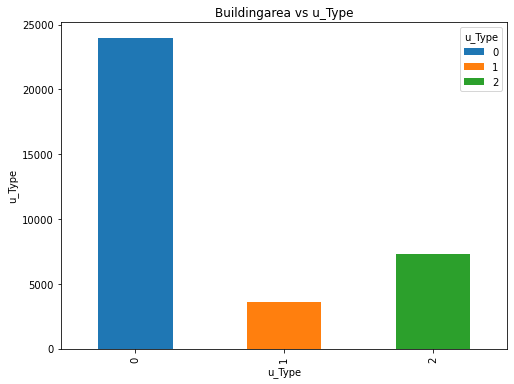

In [141]:
group_counts = data.groupby('u_Type')['u_Type'].value_counts().unstack(fill_value=0)


fig = plt.figure(figsize=(12, 14))

group_counts.plot(kind='bar', stacked=True, figsize=(8,6))


plt.xlabel('u_Type')
plt.ylabel('u_Type')
plt.title('Buildingarea vs u_Type')


plt.show()

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rooms'>

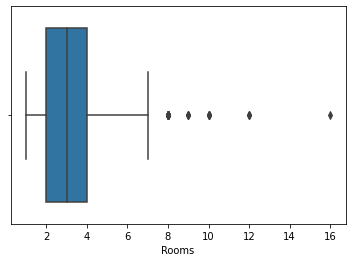

In [142]:
sns.boxplot(data['Rooms'])

In [143]:
data['Rooms'].describe()

count    34854.000000
mean         3.031072
std          0.969943
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: Rooms, dtype: float64

In [144]:
q1 = data.Rooms.quantile(0.25)
q3 = data.Rooms.quantile(0.75)
iqr=q3-q1
lower_limit=q1 - 1.5 * iqr
upper_limit=q3 + 1.5 *iqr
data=data[(data.Rooms<upper_limit)|(data.Rooms<lower_limit)]
data

,Unnamed,Suburb,Address,Rooms,Price,Date,Distance,Postcode,Bedroom,Bathroom,...,Buildingarea,CouncilArea,Regionname,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
0,1,Abbotsford,68 Studley St,2,1.167510e+06,2016-03-09,2.5,3067.0,2.0,1.0,...,71.306123,Yarra City Council,Northern Metropolitan,4019.0,1,1,0,0,31,2
1,2,Abbotsford,85 Turner St,2,1.480000e+06,2016-03-12,2.5,3067.0,2.0,1.0,...,71.305171,Yarra City Council,Northern Metropolitan,4019.0,1,2,0,0,31,2
2,3,Abbotsford,25 Bloomburg St,2,1.035000e+06,2016-04-02,2.5,3067.0,2.0,1.0,...,79.000000,Yarra City Council,Northern Metropolitan,4019.0,1,3,0,0,31,2
3,4,Abbotsford,18/659 Victoria St,3,1.132960e+06,2016-04-02,2.5,3067.0,3.0,2.0,...,137.725610,Yarra City Council,Northern Metropolitan,4019.0,1,4,0,2,31,2
4,5,Abbotsford,5 Charles St,3,1.465000e+06,2017-04-03,2.5,3067.0,3.0,2.0,...,150.000000,Yarra City Council,Northern Metropolitan,4019.0,1,5,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,34853,Yarraville,13 Burns St,4,1.480000e+06,2018-02-24,6.3,3013.0,4.0,1.0,...,176.535100,Maribyrnong City Council,Western Metropolitan,6543.0,1,34853,348,0,16,6
34850,34854,Yarraville,29A Murray St,2,8.880000e+05,2018-02-24,6.3,3013.0,2.0,2.0,...,104.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34854,348,0,16,6
34851,34855,Yarraville,147A Severn St,2,7.050000e+05,2018-02-24,6.3,3013.0,2.0,1.0,...,120.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34855,348,1,16,6
34852,34856,Yarraville,12/37 Stephen St,3,1.140000e+06,2018-02-24,6.3,3013.0,3.0,2.0,...,115.331975,Maribyrnong City Council,Western Metropolitan,6543.0,1,34856,348,0,16,6


/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rooms'>

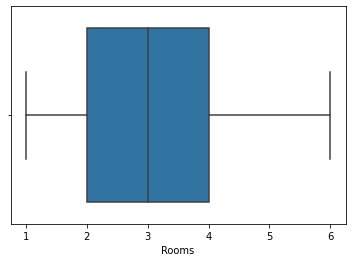

In [145]:
sns.boxplot(data['Rooms'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

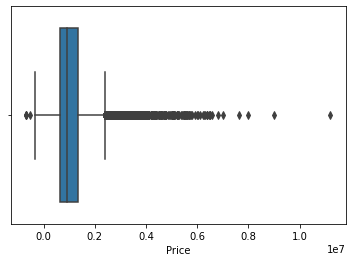

In [146]:
sns.boxplot(data['Price'])

In [147]:
q1 = data.Price.quantile(0.25)
q3 = data.Price.quantile(0.75)
iqr=q3-q1
lower_limit=q1 - 1.5 * iqr
upper_limit=q3 + 1.5 *iqr
data=data[(data.Price<upper_limit)|(data.Price<lower_limit)]
data

,Unnamed,Suburb,Address,Rooms,Price,Date,Distance,Postcode,Bedroom,Bathroom,...,Buildingarea,CouncilArea,Regionname,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
0,1,Abbotsford,68 Studley St,2,1.167510e+06,2016-03-09,2.5,3067.0,2.0,1.0,...,71.306123,Yarra City Council,Northern Metropolitan,4019.0,1,1,0,0,31,2
1,2,Abbotsford,85 Turner St,2,1.480000e+06,2016-03-12,2.5,3067.0,2.0,1.0,...,71.305171,Yarra City Council,Northern Metropolitan,4019.0,1,2,0,0,31,2
2,3,Abbotsford,25 Bloomburg St,2,1.035000e+06,2016-04-02,2.5,3067.0,2.0,1.0,...,79.000000,Yarra City Council,Northern Metropolitan,4019.0,1,3,0,0,31,2
3,4,Abbotsford,18/659 Victoria St,3,1.132960e+06,2016-04-02,2.5,3067.0,3.0,2.0,...,137.725610,Yarra City Council,Northern Metropolitan,4019.0,1,4,0,2,31,2
4,5,Abbotsford,5 Charles St,3,1.465000e+06,2017-04-03,2.5,3067.0,3.0,2.0,...,150.000000,Yarra City Council,Northern Metropolitan,4019.0,1,5,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,34853,Yarraville,13 Burns St,4,1.480000e+06,2018-02-24,6.3,3013.0,4.0,1.0,...,176.535100,Maribyrnong City Council,Western Metropolitan,6543.0,1,34853,348,0,16,6
34850,34854,Yarraville,29A Murray St,2,8.880000e+05,2018-02-24,6.3,3013.0,2.0,2.0,...,104.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34854,348,0,16,6
34851,34855,Yarraville,147A Severn St,2,7.050000e+05,2018-02-24,6.3,3013.0,2.0,1.0,...,120.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34855,348,1,16,6
34852,34856,Yarraville,12/37 Stephen St,3,1.140000e+06,2018-02-24,6.3,3013.0,3.0,2.0,...,115.331975,Maribyrnong City Council,Western Metropolitan,6543.0,1,34856,348,0,16,6


/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

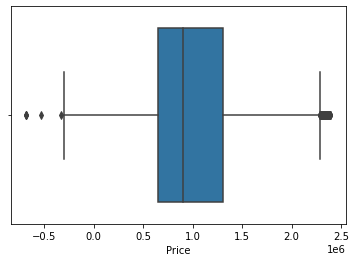

In [148]:
sns.boxplot(data['Price'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

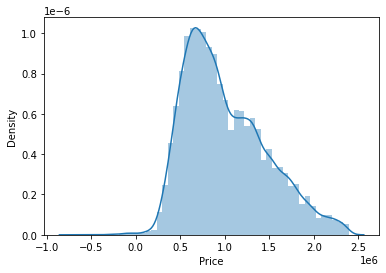

In [149]:
sns.distplot(data['Price'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bedroom', ylabel='Density'>

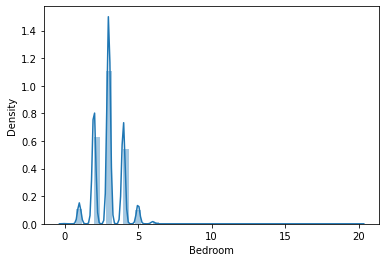

In [150]:
sns.distplot(data['Bedroom'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bedroom'>

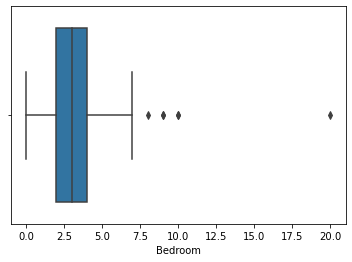

In [151]:
sns.boxplot(data['Bedroom'])

In [152]:
q1 = data.Bedroom.quantile(0.25)
q3 = data.Bedroom.quantile(0.75)
iqr=q3-q1
lower_limit=q1 - 1.5 * iqr
upper_limit=q3 + 1.5 *iqr
data=data[(data.Bedroom<upper_limit)|(data.Bedroom<lower_limit)]
data

,Unnamed,Suburb,Address,Rooms,Price,Date,Distance,Postcode,Bedroom,Bathroom,...,Buildingarea,CouncilArea,Regionname,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
0,1,Abbotsford,68 Studley St,2,1.167510e+06,2016-03-09,2.5,3067.0,2.0,1.0,...,71.306123,Yarra City Council,Northern Metropolitan,4019.0,1,1,0,0,31,2
1,2,Abbotsford,85 Turner St,2,1.480000e+06,2016-03-12,2.5,3067.0,2.0,1.0,...,71.305171,Yarra City Council,Northern Metropolitan,4019.0,1,2,0,0,31,2
2,3,Abbotsford,25 Bloomburg St,2,1.035000e+06,2016-04-02,2.5,3067.0,2.0,1.0,...,79.000000,Yarra City Council,Northern Metropolitan,4019.0,1,3,0,0,31,2
3,4,Abbotsford,18/659 Victoria St,3,1.132960e+06,2016-04-02,2.5,3067.0,3.0,2.0,...,137.725610,Yarra City Council,Northern Metropolitan,4019.0,1,4,0,2,31,2
4,5,Abbotsford,5 Charles St,3,1.465000e+06,2017-04-03,2.5,3067.0,3.0,2.0,...,150.000000,Yarra City Council,Northern Metropolitan,4019.0,1,5,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,34853,Yarraville,13 Burns St,4,1.480000e+06,2018-02-24,6.3,3013.0,4.0,1.0,...,176.535100,Maribyrnong City Council,Western Metropolitan,6543.0,1,34853,348,0,16,6
34850,34854,Yarraville,29A Murray St,2,8.880000e+05,2018-02-24,6.3,3013.0,2.0,2.0,...,104.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34854,348,0,16,6
34851,34855,Yarraville,147A Severn St,2,7.050000e+05,2018-02-24,6.3,3013.0,2.0,1.0,...,120.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34855,348,1,16,6
34852,34856,Yarraville,12/37 Stephen St,3,1.140000e+06,2018-02-24,6.3,3013.0,3.0,2.0,...,115.331975,Maribyrnong City Council,Western Metropolitan,6543.0,1,34856,348,0,16,6


/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bedroom', ylabel='Density'>

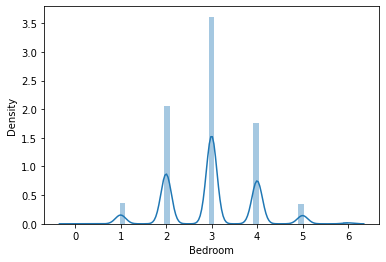

In [153]:
sns.distplot(data['Bedroom'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bedroom'>

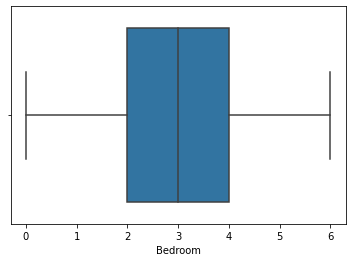

In [154]:
sns.boxplot(data['Bedroom'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bathroom'>

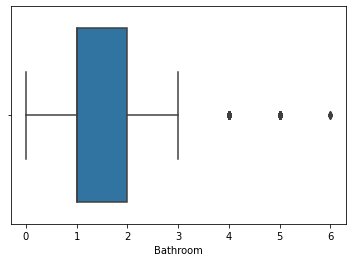

In [155]:
sns.boxplot(data['Bathroom'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bathroom', ylabel='Density'>

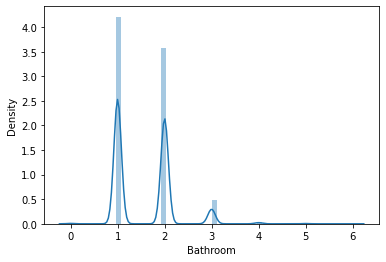

In [156]:
sns.distplot(data['Bathroom'])

In [157]:
q1 = data.Bathroom.quantile(0.25)
q3 = data.Bathroom.quantile(0.75)
iqr=q3-q1
lower_limit=q1 - 1.5 * iqr
upper_limit=q3 + 1.5 *iqr
data=data[(data.Bathroom<upper_limit)|(data.Bathroom<lower_limit)]
data

,Unnamed,Suburb,Address,Rooms,Price,Date,Distance,Postcode,Bedroom,Bathroom,...,Buildingarea,CouncilArea,Regionname,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
0,1,Abbotsford,68 Studley St,2,1.167510e+06,2016-03-09,2.5,3067.0,2.0,1.0,...,71.306123,Yarra City Council,Northern Metropolitan,4019.0,1,1,0,0,31,2
1,2,Abbotsford,85 Turner St,2,1.480000e+06,2016-03-12,2.5,3067.0,2.0,1.0,...,71.305171,Yarra City Council,Northern Metropolitan,4019.0,1,2,0,0,31,2
2,3,Abbotsford,25 Bloomburg St,2,1.035000e+06,2016-04-02,2.5,3067.0,2.0,1.0,...,79.000000,Yarra City Council,Northern Metropolitan,4019.0,1,3,0,0,31,2
3,4,Abbotsford,18/659 Victoria St,3,1.132960e+06,2016-04-02,2.5,3067.0,3.0,2.0,...,137.725610,Yarra City Council,Northern Metropolitan,4019.0,1,4,0,2,31,2
4,5,Abbotsford,5 Charles St,3,1.465000e+06,2017-04-03,2.5,3067.0,3.0,2.0,...,150.000000,Yarra City Council,Northern Metropolitan,4019.0,1,5,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,34853,Yarraville,13 Burns St,4,1.480000e+06,2018-02-24,6.3,3013.0,4.0,1.0,...,176.535100,Maribyrnong City Council,Western Metropolitan,6543.0,1,34853,348,0,16,6
34850,34854,Yarraville,29A Murray St,2,8.880000e+05,2018-02-24,6.3,3013.0,2.0,2.0,...,104.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34854,348,0,16,6
34851,34855,Yarraville,147A Severn St,2,7.050000e+05,2018-02-24,6.3,3013.0,2.0,1.0,...,120.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34855,348,1,16,6
34852,34856,Yarraville,12/37 Stephen St,3,1.140000e+06,2018-02-24,6.3,3013.0,3.0,2.0,...,115.331975,Maribyrnong City Council,Western Metropolitan,6543.0,1,34856,348,0,16,6


/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bathroom', ylabel='Density'>

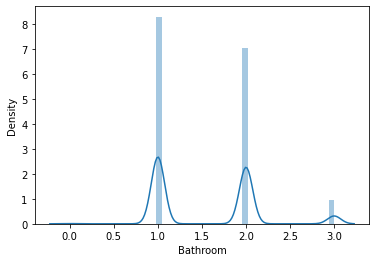

In [158]:
sns.distplot(data['Bathroom'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bathroom'>

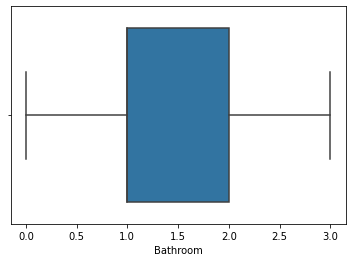

In [159]:
sns.boxplot(data['Bathroom'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Car'>

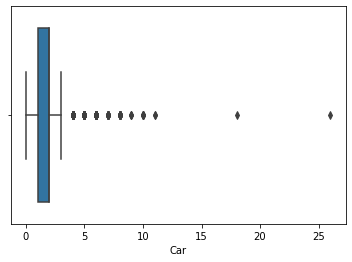

In [160]:
sns.boxplot(data['Car'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Car', ylabel='Density'>

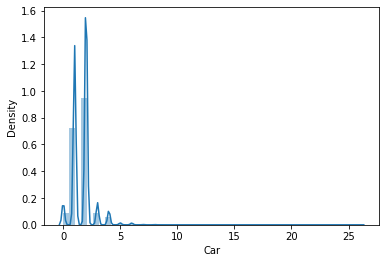

In [161]:
sns.distplot(data['Car'])

In [162]:
q1 = data.Car.quantile(0.25)
q3 = data.Car.quantile(0.75)
iqr=q3-q1
lower_limit=q1 - 1.5 * iqr
upper_limit=q3 + 1.5 *iqr
data=data[(data.Car<upper_limit)|(data.Car<lower_limit)]
data

,Unnamed,Suburb,Address,Rooms,Price,Date,Distance,Postcode,Bedroom,Bathroom,...,Buildingarea,CouncilArea,Regionname,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
0,1,Abbotsford,68 Studley St,2,1.167510e+06,2016-03-09,2.5,3067.0,2.0,1.0,...,71.306123,Yarra City Council,Northern Metropolitan,4019.0,1,1,0,0,31,2
1,2,Abbotsford,85 Turner St,2,1.480000e+06,2016-03-12,2.5,3067.0,2.0,1.0,...,71.305171,Yarra City Council,Northern Metropolitan,4019.0,1,2,0,0,31,2
2,3,Abbotsford,25 Bloomburg St,2,1.035000e+06,2016-04-02,2.5,3067.0,2.0,1.0,...,79.000000,Yarra City Council,Northern Metropolitan,4019.0,1,3,0,0,31,2
3,4,Abbotsford,18/659 Victoria St,3,1.132960e+06,2016-04-02,2.5,3067.0,3.0,2.0,...,137.725610,Yarra City Council,Northern Metropolitan,4019.0,1,4,0,2,31,2
4,5,Abbotsford,5 Charles St,3,1.465000e+06,2017-04-03,2.5,3067.0,3.0,2.0,...,150.000000,Yarra City Council,Northern Metropolitan,4019.0,1,5,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,34853,Yarraville,13 Burns St,4,1.480000e+06,2018-02-24,6.3,3013.0,4.0,1.0,...,176.535100,Maribyrnong City Council,Western Metropolitan,6543.0,1,34853,348,0,16,6
34850,34854,Yarraville,29A Murray St,2,8.880000e+05,2018-02-24,6.3,3013.0,2.0,2.0,...,104.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34854,348,0,16,6
34851,34855,Yarraville,147A Severn St,2,7.050000e+05,2018-02-24,6.3,3013.0,2.0,1.0,...,120.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34855,348,1,16,6
34852,34856,Yarraville,12/37 Stephen St,3,1.140000e+06,2018-02-24,6.3,3013.0,3.0,2.0,...,115.331975,Maribyrnong City Council,Western Metropolitan,6543.0,1,34856,348,0,16,6


/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Car', ylabel='Density'>

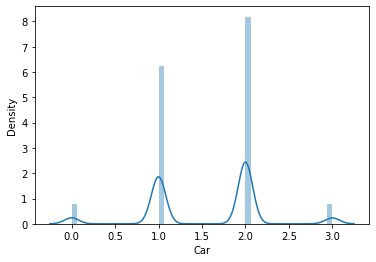

In [163]:
sns.distplot(data['Car'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Car'>

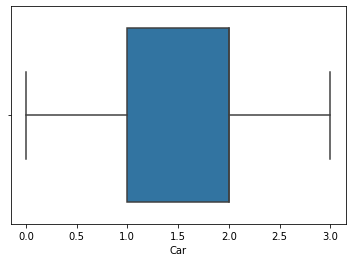

In [164]:
sns.boxplot(data['Car'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Landsize', ylabel='Density'>

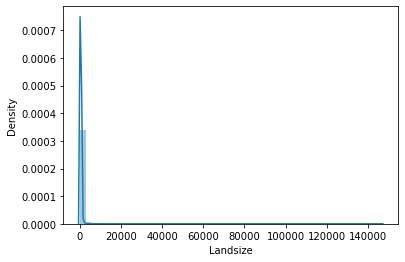

In [165]:
sns.distplot(data['Landsize'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Landsize'>

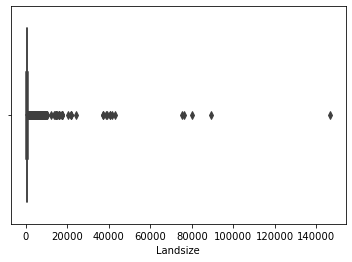

In [166]:
sns.boxplot(data['Landsize'])

In [167]:
q1 = data.Landsize.quantile(0.25)
q3 = data.Landsize.quantile(0.75)
iqr=q3-q1
lower_limit=q1 - 1.5 * iqr
upper_limit=q3 + 1.5 *iqr
data=data[(data.Landsize<upper_limit)|(data.Landsize<lower_limit)]
data

,Unnamed,Suburb,Address,Rooms,Price,Date,Distance,Postcode,Bedroom,Bathroom,...,Buildingarea,CouncilArea,Regionname,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
0,1,Abbotsford,68 Studley St,2,1.167510e+06,2016-03-09,2.5,3067.0,2.0,1.0,...,71.306123,Yarra City Council,Northern Metropolitan,4019.0,1,1,0,0,31,2
1,2,Abbotsford,85 Turner St,2,1.480000e+06,2016-03-12,2.5,3067.0,2.0,1.0,...,71.305171,Yarra City Council,Northern Metropolitan,4019.0,1,2,0,0,31,2
2,3,Abbotsford,25 Bloomburg St,2,1.035000e+06,2016-04-02,2.5,3067.0,2.0,1.0,...,79.000000,Yarra City Council,Northern Metropolitan,4019.0,1,3,0,0,31,2
3,4,Abbotsford,18/659 Victoria St,3,1.132960e+06,2016-04-02,2.5,3067.0,3.0,2.0,...,137.725610,Yarra City Council,Northern Metropolitan,4019.0,1,4,0,2,31,2
4,5,Abbotsford,5 Charles St,3,1.465000e+06,2017-04-03,2.5,3067.0,3.0,2.0,...,150.000000,Yarra City Council,Northern Metropolitan,4019.0,1,5,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,34853,Yarraville,13 Burns St,4,1.480000e+06,2018-02-24,6.3,3013.0,4.0,1.0,...,176.535100,Maribyrnong City Council,Western Metropolitan,6543.0,1,34853,348,0,16,6
34850,34854,Yarraville,29A Murray St,2,8.880000e+05,2018-02-24,6.3,3013.0,2.0,2.0,...,104.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34854,348,0,16,6
34851,34855,Yarraville,147A Severn St,2,7.050000e+05,2018-02-24,6.3,3013.0,2.0,1.0,...,120.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34855,348,1,16,6
34852,34856,Yarraville,12/37 Stephen St,3,1.140000e+06,2018-02-24,6.3,3013.0,3.0,2.0,...,115.331975,Maribyrnong City Council,Western Metropolitan,6543.0,1,34856,348,0,16,6


/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Landsize'>

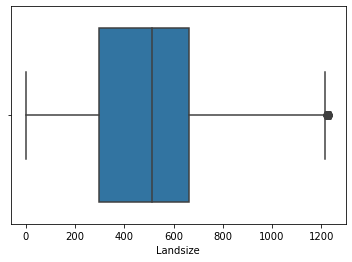

In [168]:
sns.boxplot(data['Landsize'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Landsize', ylabel='Density'>

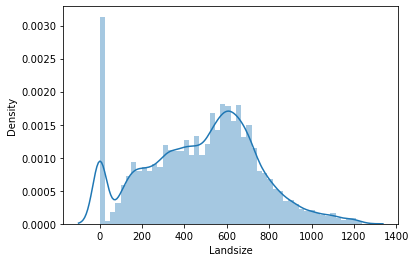

In [169]:
sns.distplot(data['Landsize'])

In [170]:
q1 = data.Landsize.quantile(0.25)
q3 = data.Landsize.quantile(0.75)
iqr=q3-q1
lower_limit=q1 - 1.5 * iqr
upper_limit=q3 + 1.5 *iqr
data=data[(data.Landsize<upper_limit)|(data.Landsize<lower_limit)]
data

,Unnamed,Suburb,Address,Rooms,Price,Date,Distance,Postcode,Bedroom,Bathroom,...,Buildingarea,CouncilArea,Regionname,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
0,1,Abbotsford,68 Studley St,2,1.167510e+06,2016-03-09,2.5,3067.0,2.0,1.0,...,71.306123,Yarra City Council,Northern Metropolitan,4019.0,1,1,0,0,31,2
1,2,Abbotsford,85 Turner St,2,1.480000e+06,2016-03-12,2.5,3067.0,2.0,1.0,...,71.305171,Yarra City Council,Northern Metropolitan,4019.0,1,2,0,0,31,2
2,3,Abbotsford,25 Bloomburg St,2,1.035000e+06,2016-04-02,2.5,3067.0,2.0,1.0,...,79.000000,Yarra City Council,Northern Metropolitan,4019.0,1,3,0,0,31,2
3,4,Abbotsford,18/659 Victoria St,3,1.132960e+06,2016-04-02,2.5,3067.0,3.0,2.0,...,137.725610,Yarra City Council,Northern Metropolitan,4019.0,1,4,0,2,31,2
4,5,Abbotsford,5 Charles St,3,1.465000e+06,2017-04-03,2.5,3067.0,3.0,2.0,...,150.000000,Yarra City Council,Northern Metropolitan,4019.0,1,5,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,34853,Yarraville,13 Burns St,4,1.480000e+06,2018-02-24,6.3,3013.0,4.0,1.0,...,176.535100,Maribyrnong City Council,Western Metropolitan,6543.0,1,34853,348,0,16,6
34850,34854,Yarraville,29A Murray St,2,8.880000e+05,2018-02-24,6.3,3013.0,2.0,2.0,...,104.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34854,348,0,16,6
34851,34855,Yarraville,147A Severn St,2,7.050000e+05,2018-02-24,6.3,3013.0,2.0,1.0,...,120.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34855,348,1,16,6
34852,34856,Yarraville,12/37 Stephen St,3,1.140000e+06,2018-02-24,6.3,3013.0,3.0,2.0,...,115.331975,Maribyrnong City Council,Western Metropolitan,6543.0,1,34856,348,0,16,6


/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Landsize'>

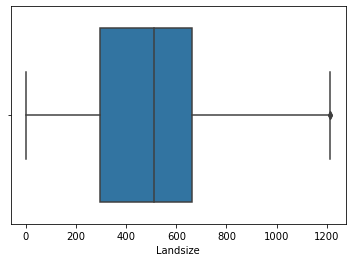

In [171]:
sns.boxplot(data['Landsize'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Landsize', ylabel='Density'>

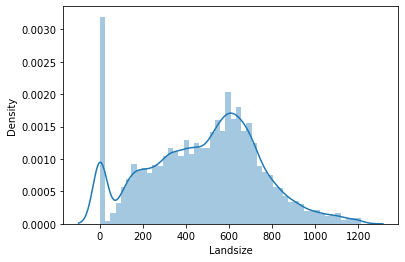

In [172]:
sns.distplot(data['Landsize'])

In [173]:
q1 = data.Landsize.quantile(0.25)
q3 = data.Landsize.quantile(0.75)
iqr=q3-q1
lower_limit=q1 - 1.5 * iqr
upper_limit=q3 + 1.5 *iqr
data=data[(data.Landsize<upper_limit)|(data.Landsize<lower_limit)]
data

,Unnamed,Suburb,Address,Rooms,Price,Date,Distance,Postcode,Bedroom,Bathroom,...,Buildingarea,CouncilArea,Regionname,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
0,1,Abbotsford,68 Studley St,2,1.167510e+06,2016-03-09,2.5,3067.0,2.0,1.0,...,71.306123,Yarra City Council,Northern Metropolitan,4019.0,1,1,0,0,31,2
1,2,Abbotsford,85 Turner St,2,1.480000e+06,2016-03-12,2.5,3067.0,2.0,1.0,...,71.305171,Yarra City Council,Northern Metropolitan,4019.0,1,2,0,0,31,2
2,3,Abbotsford,25 Bloomburg St,2,1.035000e+06,2016-04-02,2.5,3067.0,2.0,1.0,...,79.000000,Yarra City Council,Northern Metropolitan,4019.0,1,3,0,0,31,2
3,4,Abbotsford,18/659 Victoria St,3,1.132960e+06,2016-04-02,2.5,3067.0,3.0,2.0,...,137.725610,Yarra City Council,Northern Metropolitan,4019.0,1,4,0,2,31,2
4,5,Abbotsford,5 Charles St,3,1.465000e+06,2017-04-03,2.5,3067.0,3.0,2.0,...,150.000000,Yarra City Council,Northern Metropolitan,4019.0,1,5,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,34853,Yarraville,13 Burns St,4,1.480000e+06,2018-02-24,6.3,3013.0,4.0,1.0,...,176.535100,Maribyrnong City Council,Western Metropolitan,6543.0,1,34853,348,0,16,6
34850,34854,Yarraville,29A Murray St,2,8.880000e+05,2018-02-24,6.3,3013.0,2.0,2.0,...,104.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34854,348,0,16,6
34851,34855,Yarraville,147A Severn St,2,7.050000e+05,2018-02-24,6.3,3013.0,2.0,1.0,...,120.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34855,348,1,16,6
34852,34856,Yarraville,12/37 Stephen St,3,1.140000e+06,2018-02-24,6.3,3013.0,3.0,2.0,...,115.331975,Maribyrnong City Council,Western Metropolitan,6543.0,1,34856,348,0,16,6


/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Landsize'>

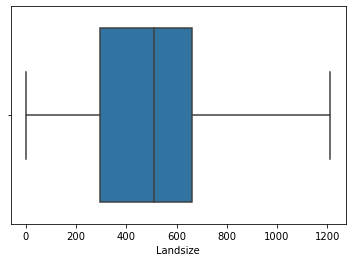

In [174]:
sns.boxplot(data['Landsize'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Landsize', ylabel='Density'>

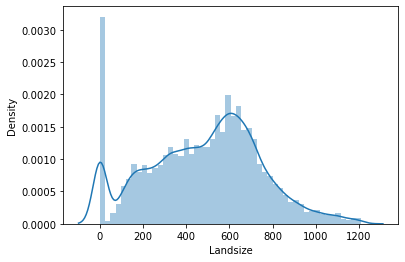

In [175]:
sns.distplot(data['Landsize'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Buildingarea', ylabel='Density'>

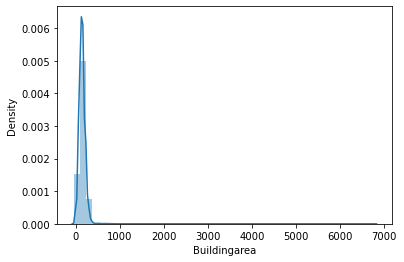

In [176]:
sns.distplot(data['Buildingarea'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Buildingarea'>

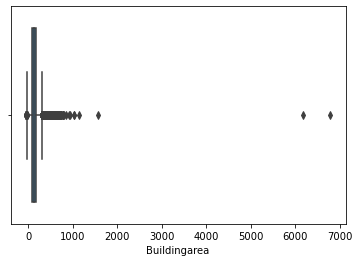

In [177]:
sns.boxplot(data['Buildingarea'])

In [178]:
q1 = data.Buildingarea.quantile(0.25)
q3 = data.Buildingarea.quantile(0.75)
iqr=q3-q1
lower_limit=q1 - 1.5 * iqr
upper_limit=q3 + 1.5 *iqr
data=data[(data.Buildingarea<upper_limit)|(data.Buildingarea<lower_limit)]
data

,Unnamed,Suburb,Address,Rooms,Price,Date,Distance,Postcode,Bedroom,Bathroom,...,Buildingarea,CouncilArea,Regionname,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
0,1,Abbotsford,68 Studley St,2,1.167510e+06,2016-03-09,2.5,3067.0,2.0,1.0,...,71.306123,Yarra City Council,Northern Metropolitan,4019.0,1,1,0,0,31,2
1,2,Abbotsford,85 Turner St,2,1.480000e+06,2016-03-12,2.5,3067.0,2.0,1.0,...,71.305171,Yarra City Council,Northern Metropolitan,4019.0,1,2,0,0,31,2
2,3,Abbotsford,25 Bloomburg St,2,1.035000e+06,2016-04-02,2.5,3067.0,2.0,1.0,...,79.000000,Yarra City Council,Northern Metropolitan,4019.0,1,3,0,0,31,2
3,4,Abbotsford,18/659 Victoria St,3,1.132960e+06,2016-04-02,2.5,3067.0,3.0,2.0,...,137.725610,Yarra City Council,Northern Metropolitan,4019.0,1,4,0,2,31,2
4,5,Abbotsford,5 Charles St,3,1.465000e+06,2017-04-03,2.5,3067.0,3.0,2.0,...,150.000000,Yarra City Council,Northern Metropolitan,4019.0,1,5,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,34853,Yarraville,13 Burns St,4,1.480000e+06,2018-02-24,6.3,3013.0,4.0,1.0,...,176.535100,Maribyrnong City Council,Western Metropolitan,6543.0,1,34853,348,0,16,6
34850,34854,Yarraville,29A Murray St,2,8.880000e+05,2018-02-24,6.3,3013.0,2.0,2.0,...,104.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34854,348,0,16,6
34851,34855,Yarraville,147A Severn St,2,7.050000e+05,2018-02-24,6.3,3013.0,2.0,1.0,...,120.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34855,348,1,16,6
34852,34856,Yarraville,12/37 Stephen St,3,1.140000e+06,2018-02-24,6.3,3013.0,3.0,2.0,...,115.331975,Maribyrnong City Council,Western Metropolitan,6543.0,1,34856,348,0,16,6


/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Buildingarea', ylabel='Density'>

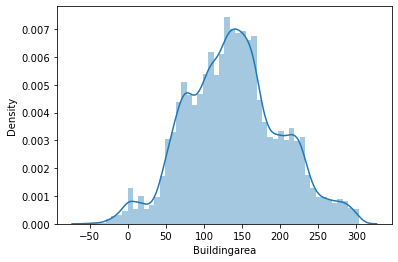

In [179]:
sns.distplot(data['Buildingarea'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Buildingarea'>

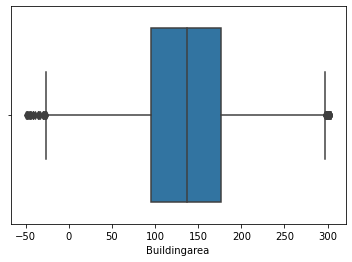

In [180]:
sns.boxplot(data['Buildingarea'])

In [181]:
q1 = data.Buildingarea.quantile(0.25)
q3 = data.Buildingarea.quantile(0.75)
iqr=q3-q1
lower_limit=q1 - 1.5 * iqr
upper_limit=q3 + 1.5 *iqr
data=data[(data.Buildingarea<upper_limit)|(data.Buildingarea<lower_limit)]
data

,Unnamed,Suburb,Address,Rooms,Price,Date,Distance,Postcode,Bedroom,Bathroom,...,Buildingarea,CouncilArea,Regionname,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
0,1,Abbotsford,68 Studley St,2,1.167510e+06,2016-03-09,2.5,3067.0,2.0,1.0,...,71.306123,Yarra City Council,Northern Metropolitan,4019.0,1,1,0,0,31,2
1,2,Abbotsford,85 Turner St,2,1.480000e+06,2016-03-12,2.5,3067.0,2.0,1.0,...,71.305171,Yarra City Council,Northern Metropolitan,4019.0,1,2,0,0,31,2
2,3,Abbotsford,25 Bloomburg St,2,1.035000e+06,2016-04-02,2.5,3067.0,2.0,1.0,...,79.000000,Yarra City Council,Northern Metropolitan,4019.0,1,3,0,0,31,2
3,4,Abbotsford,18/659 Victoria St,3,1.132960e+06,2016-04-02,2.5,3067.0,3.0,2.0,...,137.725610,Yarra City Council,Northern Metropolitan,4019.0,1,4,0,2,31,2
4,5,Abbotsford,5 Charles St,3,1.465000e+06,2017-04-03,2.5,3067.0,3.0,2.0,...,150.000000,Yarra City Council,Northern Metropolitan,4019.0,1,5,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,34853,Yarraville,13 Burns St,4,1.480000e+06,2018-02-24,6.3,3013.0,4.0,1.0,...,176.535100,Maribyrnong City Council,Western Metropolitan,6543.0,1,34853,348,0,16,6
34850,34854,Yarraville,29A Murray St,2,8.880000e+05,2018-02-24,6.3,3013.0,2.0,2.0,...,104.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34854,348,0,16,6
34851,34855,Yarraville,147A Severn St,2,7.050000e+05,2018-02-24,6.3,3013.0,2.0,1.0,...,120.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34855,348,1,16,6
34852,34856,Yarraville,12/37 Stephen St,3,1.140000e+06,2018-02-24,6.3,3013.0,3.0,2.0,...,115.331975,Maribyrnong City Council,Western Metropolitan,6543.0,1,34856,348,0,16,6


/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Buildingarea', ylabel='Density'>

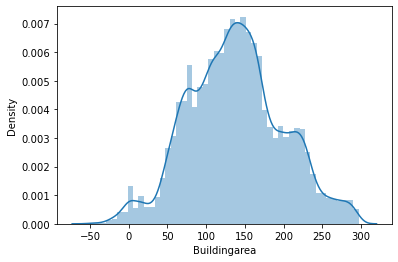

In [182]:
sns.distplot(data['Buildingarea'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Buildingarea'>

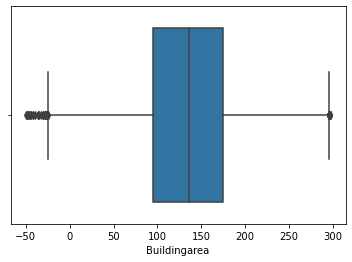

In [183]:
sns.boxplot(data['Buildingarea'])

In [184]:
q1 = data.Buildingarea.quantile(0.25)
q3 = data.Buildingarea.quantile(0.75)
iqr=q3-q1
lower_limit=q1 - 1.5 * iqr
upper_limit=q3 + 1.5 *iqr
data=data[(data.Buildingarea<upper_limit)|(data.Buildingarea<lower_limit)]
data

,Unnamed,Suburb,Address,Rooms,Price,Date,Distance,Postcode,Bedroom,Bathroom,...,Buildingarea,CouncilArea,Regionname,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
0,1,Abbotsford,68 Studley St,2,1.167510e+06,2016-03-09,2.5,3067.0,2.0,1.0,...,71.306123,Yarra City Council,Northern Metropolitan,4019.0,1,1,0,0,31,2
1,2,Abbotsford,85 Turner St,2,1.480000e+06,2016-03-12,2.5,3067.0,2.0,1.0,...,71.305171,Yarra City Council,Northern Metropolitan,4019.0,1,2,0,0,31,2
2,3,Abbotsford,25 Bloomburg St,2,1.035000e+06,2016-04-02,2.5,3067.0,2.0,1.0,...,79.000000,Yarra City Council,Northern Metropolitan,4019.0,1,3,0,0,31,2
3,4,Abbotsford,18/659 Victoria St,3,1.132960e+06,2016-04-02,2.5,3067.0,3.0,2.0,...,137.725610,Yarra City Council,Northern Metropolitan,4019.0,1,4,0,2,31,2
4,5,Abbotsford,5 Charles St,3,1.465000e+06,2017-04-03,2.5,3067.0,3.0,2.0,...,150.000000,Yarra City Council,Northern Metropolitan,4019.0,1,5,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,34853,Yarraville,13 Burns St,4,1.480000e+06,2018-02-24,6.3,3013.0,4.0,1.0,...,176.535100,Maribyrnong City Council,Western Metropolitan,6543.0,1,34853,348,0,16,6
34850,34854,Yarraville,29A Murray St,2,8.880000e+05,2018-02-24,6.3,3013.0,2.0,2.0,...,104.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34854,348,0,16,6
34851,34855,Yarraville,147A Severn St,2,7.050000e+05,2018-02-24,6.3,3013.0,2.0,1.0,...,120.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34855,348,1,16,6
34852,34856,Yarraville,12/37 Stephen St,3,1.140000e+06,2018-02-24,6.3,3013.0,3.0,2.0,...,115.331975,Maribyrnong City Council,Western Metropolitan,6543.0,1,34856,348,0,16,6


/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Buildingarea', ylabel='Density'>

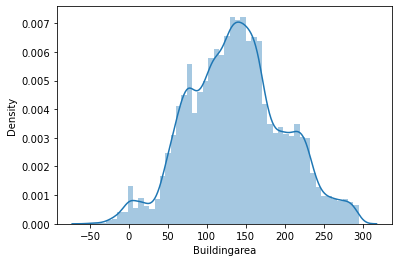

In [185]:
sns.distplot(data['Buildingarea'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Buildingarea'>

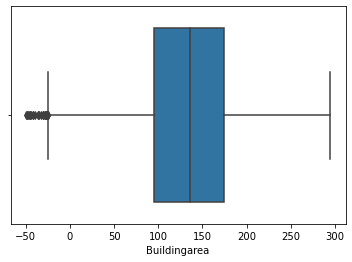

In [186]:
sns.boxplot(data['Buildingarea'])

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30683 entries, 0 to 34853
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed        30683 non-null  int64         
 1   Suburb         30683 non-null  object        
 2   Address        30683 non-null  object        
 3   Rooms          30683 non-null  int64         
 4   Price          30683 non-null  float64       
 5   Date           30683 non-null  datetime64[ns]
 6   Distance       30683 non-null  float64       
 7   Postcode       30683 non-null  float64       
 8   Bedroom        30683 non-null  float64       
 9   Bathroom       30683 non-null  float64       
 10  Car            30683 non-null  float64       
 11  Landsize       30683 non-null  float64       
 12  Buildingarea   30683 non-null  float64       
 13  CouncilArea    30683 non-null  object        
 14  Regionname     30683 non-null  object        
 15  Propertycount  3068

In [188]:
data1=data.drop(['Suburb','Address','Date','CouncilArea','Regionname','num','ID','u_suburb','u_Type','u_CouncilArea','u_Regionname'],axis=1)

<AxesSubplot:>

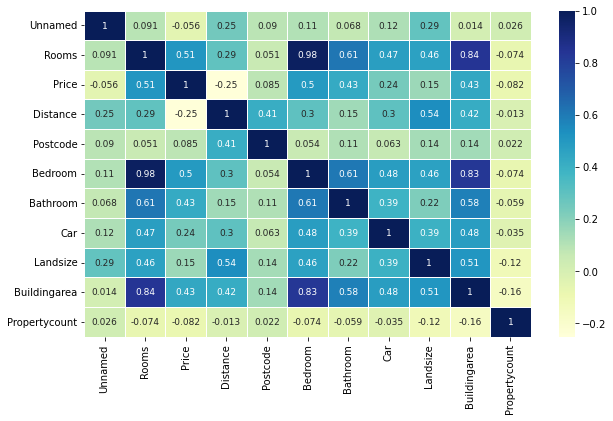

In [189]:
plt.figure(figsize = (10,6))
sns.heatmap(data1.corr(), cmap = 'YlGnBu', linewidth = 1, annot = True, annot_kws = {'size':9})

In [190]:
data=data.drop('Rooms',axis=1)

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30683 entries, 0 to 34853
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed        30683 non-null  int64         
 1   Suburb         30683 non-null  object        
 2   Address        30683 non-null  object        
 3   Price          30683 non-null  float64       
 4   Date           30683 non-null  datetime64[ns]
 5   Distance       30683 non-null  float64       
 6   Postcode       30683 non-null  float64       
 7   Bedroom        30683 non-null  float64       
 8   Bathroom       30683 non-null  float64       
 9   Car            30683 non-null  float64       
 10  Landsize       30683 non-null  float64       
 11  Buildingarea   30683 non-null  float64       
 12  CouncilArea    30683 non-null  object        
 13  Regionname     30683 non-null  object        
 14  Propertycount  30683 non-null  float64       
 15  num            3068

In [192]:
data.describe()

,Unnamed,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,Buildingarea,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
count,30683.000000,3.068300e+04,30683.000000,30683.000000,30683.000000,30683.00000,30683.000000,30683.000000,30683.000000,30683.000000,30683.0,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000
mean,17334.753055,9.913904e+05,10.916107,3109.037154,2.909429,1.51817,1.548414,478.670774,137.483363,7595.471564,1.0,17334.753055,172.341557,0.563798,13.826647,3.644168
std,10056.173541,4.482668e+05,6.356460,91.369979,0.878873,0.58890,0.663294,262.289568,60.517344,4474.207559,0.0,10056.173541,100.610796,0.834524,9.872492,2.061446
min,1.000000,-6.866689e+05,0.000000,3000.000000,0.000000,0.00000,0.000000,0.000000,-49.930701,335.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8610.500000,6.467793e+05,6.300000,3047.000000,2.000000,1.00000,1.000000,288.384459,95.000000,4380.000000,1.0,8610.500000,78.000000,0.000000,6.000000,2.000000
50%,17239.000000,9.000000e+05,10.200000,3095.000000,3.000000,1.00000,2.000000,506.000000,136.296093,6763.000000,1.0,17239.000000,173.000000,0.000000,13.000000,5.000000
75%,26043.000000,1.291000e+06,13.900000,3150.000000,3.000000,2.00000,2.000000,659.000000,175.000000,10412.000000,1.0,26043.000000,262.000000,1.000000,22.000000,5.000000
max,34857.000000,2.390000e+06,48.100000,3977.000000,6.000000,3.00000,3.000000,1212.000000,294.889052,21650.000000,1.0,34857.000000,350.000000,2.000000,32.000000,7.000000


In [193]:
data['Price'].min()

-686668.8842860609

In [194]:
data=data.loc[data['Price']>=646779 ]

In [195]:
data.describe()

,Unnamed,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,Buildingarea,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
count,23012.000000,2.301200e+04,23012.000000,23012.000000,23012.000000,23012.000000,23012.000000,23012.000000,23012.000000,23012.000000,23012.0,23012.000000,23012.000000,23012.000000,23012.000000,23012.000000
mean,17211.172345,1.156843e+06,10.322245,3108.816400,3.110421,1.615288,1.628281,502.437793,149.479581,7316.439293,1.0,17211.172345,166.549844,0.357683,13.356423,3.605901
std,10161.062831,3.919302e+05,5.550265,76.304746,0.793164,0.600984,0.674225,244.294343,55.817740,4193.487886,0.0,10161.062831,101.775673,0.683399,9.881649,2.090567
min,1.000000,6.470000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,-27.177069,335.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8253.750000,8.300000e+05,6.300000,3056.000000,3.000000,1.000000,1.000000,323.000000,111.420016,4280.000000,1.0,8253.750000,66.000000,0.000000,3.000000,2.000000
50%,17050.000000,1.080000e+06,9.700000,3104.000000,3.000000,2.000000,2.000000,531.000000,145.866269,6543.000000,1.0,17050.000000,166.000000,0.000000,12.000000,5.000000
75%,25996.500000,1.400262e+06,13.700000,3151.000000,4.000000,2.000000,2.000000,670.000000,186.735257,10175.000000,1.0,25996.500000,260.000000,0.000000,22.000000,5.000000
max,34857.000000,2.390000e+06,45.900000,3977.000000,6.000000,3.000000,3.000000,1212.000000,294.889052,21650.000000,1.0,34857.000000,350.000000,2.000000,32.000000,7.000000


In [196]:
data1=data.loc[data['Bedroom']>=1 ]
data1

,Unnamed,Suburb,Address,Price,Date,Distance,Postcode,Bedroom,Bathroom,Car,...,Buildingarea,CouncilArea,Regionname,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
0,1,Abbotsford,68 Studley St,1.167510e+06,2016-03-09,2.5,3067.0,2.0,1.0,1.0,...,71.306123,Yarra City Council,Northern Metropolitan,4019.0,1,1,0,0,31,2
1,2,Abbotsford,85 Turner St,1.480000e+06,2016-03-12,2.5,3067.0,2.0,1.0,1.0,...,71.305171,Yarra City Council,Northern Metropolitan,4019.0,1,2,0,0,31,2
2,3,Abbotsford,25 Bloomburg St,1.035000e+06,2016-04-02,2.5,3067.0,2.0,1.0,0.0,...,79.000000,Yarra City Council,Northern Metropolitan,4019.0,1,3,0,0,31,2
3,4,Abbotsford,18/659 Victoria St,1.132960e+06,2016-04-02,2.5,3067.0,3.0,2.0,1.0,...,137.725610,Yarra City Council,Northern Metropolitan,4019.0,1,4,0,2,31,2
4,5,Abbotsford,5 Charles St,1.465000e+06,2017-04-03,2.5,3067.0,3.0,2.0,0.0,...,150.000000,Yarra City Council,Northern Metropolitan,4019.0,1,5,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,34853,Yarraville,13 Burns St,1.480000e+06,2018-02-24,6.3,3013.0,4.0,1.0,3.0,...,176.535100,Maribyrnong City Council,Western Metropolitan,6543.0,1,34853,348,0,16,6
34850,34854,Yarraville,29A Murray St,8.880000e+05,2018-02-24,6.3,3013.0,2.0,2.0,1.0,...,104.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34854,348,0,16,6
34851,34855,Yarraville,147A Severn St,7.050000e+05,2018-02-24,6.3,3013.0,2.0,1.0,2.0,...,120.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34855,348,1,16,6
34852,34856,Yarraville,12/37 Stephen St,1.140000e+06,2018-02-24,6.3,3013.0,3.0,2.0,2.0,...,115.331975,Maribyrnong City Council,Western Metropolitan,6543.0,1,34856,348,0,16,6


In [197]:
data2=data1.loc[data1['Bathroom']>=1 ]
data2

,Unnamed,Suburb,Address,Price,Date,Distance,Postcode,Bedroom,Bathroom,Car,...,Buildingarea,CouncilArea,Regionname,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
0,1,Abbotsford,68 Studley St,1.167510e+06,2016-03-09,2.5,3067.0,2.0,1.0,1.0,...,71.306123,Yarra City Council,Northern Metropolitan,4019.0,1,1,0,0,31,2
1,2,Abbotsford,85 Turner St,1.480000e+06,2016-03-12,2.5,3067.0,2.0,1.0,1.0,...,71.305171,Yarra City Council,Northern Metropolitan,4019.0,1,2,0,0,31,2
2,3,Abbotsford,25 Bloomburg St,1.035000e+06,2016-04-02,2.5,3067.0,2.0,1.0,0.0,...,79.000000,Yarra City Council,Northern Metropolitan,4019.0,1,3,0,0,31,2
3,4,Abbotsford,18/659 Victoria St,1.132960e+06,2016-04-02,2.5,3067.0,3.0,2.0,1.0,...,137.725610,Yarra City Council,Northern Metropolitan,4019.0,1,4,0,2,31,2
4,5,Abbotsford,5 Charles St,1.465000e+06,2017-04-03,2.5,3067.0,3.0,2.0,0.0,...,150.000000,Yarra City Council,Northern Metropolitan,4019.0,1,5,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,34853,Yarraville,13 Burns St,1.480000e+06,2018-02-24,6.3,3013.0,4.0,1.0,3.0,...,176.535100,Maribyrnong City Council,Western Metropolitan,6543.0,1,34853,348,0,16,6
34850,34854,Yarraville,29A Murray St,8.880000e+05,2018-02-24,6.3,3013.0,2.0,2.0,1.0,...,104.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34854,348,0,16,6
34851,34855,Yarraville,147A Severn St,7.050000e+05,2018-02-24,6.3,3013.0,2.0,1.0,2.0,...,120.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34855,348,1,16,6
34852,34856,Yarraville,12/37 Stephen St,1.140000e+06,2018-02-24,6.3,3013.0,3.0,2.0,2.0,...,115.331975,Maribyrnong City Council,Western Metropolitan,6543.0,1,34856,348,0,16,6


In [198]:
data3=data2.loc[data2['Landsize']>=50 ]
data3

,Unnamed,Suburb,Address,Price,Date,Distance,Postcode,Bedroom,Bathroom,Car,...,Buildingarea,CouncilArea,Regionname,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
0,1,Abbotsford,68 Studley St,1.167510e+06,2016-03-09,2.5,3067.0,2.0,1.0,1.0,...,71.306123,Yarra City Council,Northern Metropolitan,4019.0,1,1,0,0,31,2
1,2,Abbotsford,85 Turner St,1.480000e+06,2016-03-12,2.5,3067.0,2.0,1.0,1.0,...,71.305171,Yarra City Council,Northern Metropolitan,4019.0,1,2,0,0,31,2
2,3,Abbotsford,25 Bloomburg St,1.035000e+06,2016-04-02,2.5,3067.0,2.0,1.0,0.0,...,79.000000,Yarra City Council,Northern Metropolitan,4019.0,1,3,0,0,31,2
4,5,Abbotsford,5 Charles St,1.465000e+06,2017-04-03,2.5,3067.0,3.0,2.0,0.0,...,150.000000,Yarra City Council,Northern Metropolitan,4019.0,1,5,0,0,31,2
5,6,Abbotsford,40 Federation La,8.500000e+05,2017-04-03,2.5,3067.0,3.0,2.0,1.0,...,132.512823,Yarra City Council,Northern Metropolitan,4019.0,1,6,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,34853,Yarraville,13 Burns St,1.480000e+06,2018-02-24,6.3,3013.0,4.0,1.0,3.0,...,176.535100,Maribyrnong City Council,Western Metropolitan,6543.0,1,34853,348,0,16,6
34850,34854,Yarraville,29A Murray St,8.880000e+05,2018-02-24,6.3,3013.0,2.0,2.0,1.0,...,104.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34854,348,0,16,6
34851,34855,Yarraville,147A Severn St,7.050000e+05,2018-02-24,6.3,3013.0,2.0,1.0,2.0,...,120.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34855,348,1,16,6
34852,34856,Yarraville,12/37 Stephen St,1.140000e+06,2018-02-24,6.3,3013.0,3.0,2.0,2.0,...,115.331975,Maribyrnong City Council,Western Metropolitan,6543.0,1,34856,348,0,16,6


In [199]:
data4=data3.loc[data3['Buildingarea']>=111 ]
data4

,Unnamed,Suburb,Address,Price,Date,Distance,Postcode,Bedroom,Bathroom,Car,...,Buildingarea,CouncilArea,Regionname,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
4,5,Abbotsford,5 Charles St,1.465000e+06,2017-04-03,2.5,3067.0,3.0,2.0,0.0,...,150.000000,Yarra City Council,Northern Metropolitan,4019.0,1,5,0,0,31,2
5,6,Abbotsford,40 Federation La,8.500000e+05,2017-04-03,2.5,3067.0,3.0,2.0,1.0,...,132.512823,Yarra City Council,Northern Metropolitan,4019.0,1,6,0,0,31,2
6,7,Abbotsford,55a Park St,1.600000e+06,2016-04-06,2.5,3067.0,3.0,1.0,2.0,...,142.000000,Yarra City Council,Northern Metropolitan,4019.0,1,7,0,0,31,2
7,8,Abbotsford,16 Maugie St,1.759245e+06,2016-06-08,2.5,3067.0,3.0,2.0,2.0,...,220.000000,Yarra City Council,Northern Metropolitan,4019.0,1,8,0,0,31,2
11,12,Abbotsford,124 Yarra St,1.876000e+06,2016-07-05,2.5,3067.0,4.0,2.0,0.0,...,210.000000,Yarra City Council,Northern Metropolitan,4019.0,1,12,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,34851,Wollert,15 Rockgarden Wy,1.238190e+06,2018-02-24,25.5,3750.0,3.0,2.0,2.0,...,135.000000,Whittlesea City Council,Northern Metropolitan,2940.0,1,34851,343,0,29,2
34848,34852,Yarraville,78 Bayview Rd,1.101000e+06,2018-02-24,6.3,3013.0,3.0,1.0,2.0,...,115.331975,Maribyrnong City Council,Western Metropolitan,6543.0,1,34852,348,0,16,6
34849,34853,Yarraville,13 Burns St,1.480000e+06,2018-02-24,6.3,3013.0,4.0,1.0,3.0,...,176.535100,Maribyrnong City Council,Western Metropolitan,6543.0,1,34853,348,0,16,6
34851,34855,Yarraville,147A Severn St,7.050000e+05,2018-02-24,6.3,3013.0,2.0,1.0,2.0,...,120.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34855,348,1,16,6


/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Buildingarea', ylabel='Density'>

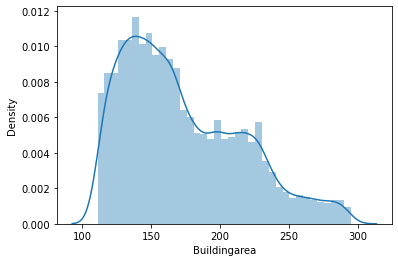

In [200]:
sns.distplot(data4['Buildingarea'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Buildingarea'>

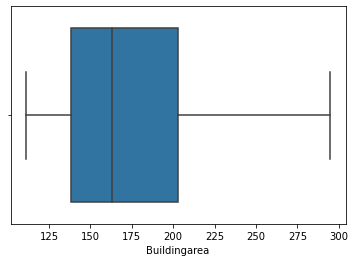

In [201]:
sns.boxplot(data4['Buildingarea'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Landsize', ylabel='Density'>

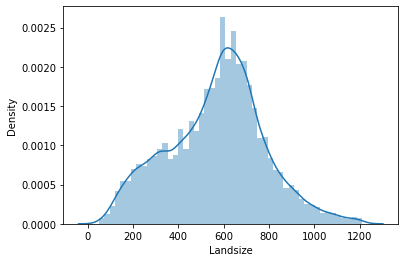

In [202]:
sns.distplot(data4['Landsize'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Landsize'>

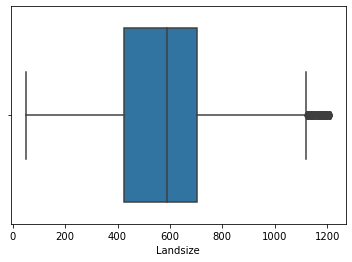

In [203]:
sns.boxplot(data4['Landsize'])

In [204]:
data4.shape

(16971, 21)

In [205]:
data4['Landsize'].describe()

count    16971.000000
mean       568.726236
std        212.891466
min         50.000000
25%        422.728131
50%        589.000000
75%        702.000000
max       1212.000000
Name: Landsize, dtype: float64

In [206]:
data5=data4.loc[data4['Landsize']<=1111]

In [207]:
data5

,Unnamed,Suburb,Address,Price,Date,Distance,Postcode,Bedroom,Bathroom,Car,...,Buildingarea,CouncilArea,Regionname,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
4,5,Abbotsford,5 Charles St,1.465000e+06,2017-04-03,2.5,3067.0,3.0,2.0,0.0,...,150.000000,Yarra City Council,Northern Metropolitan,4019.0,1,5,0,0,31,2
5,6,Abbotsford,40 Federation La,8.500000e+05,2017-04-03,2.5,3067.0,3.0,2.0,1.0,...,132.512823,Yarra City Council,Northern Metropolitan,4019.0,1,6,0,0,31,2
6,7,Abbotsford,55a Park St,1.600000e+06,2016-04-06,2.5,3067.0,3.0,1.0,2.0,...,142.000000,Yarra City Council,Northern Metropolitan,4019.0,1,7,0,0,31,2
7,8,Abbotsford,16 Maugie St,1.759245e+06,2016-06-08,2.5,3067.0,3.0,2.0,2.0,...,220.000000,Yarra City Council,Northern Metropolitan,4019.0,1,8,0,0,31,2
11,12,Abbotsford,124 Yarra St,1.876000e+06,2016-07-05,2.5,3067.0,4.0,2.0,0.0,...,210.000000,Yarra City Council,Northern Metropolitan,4019.0,1,12,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,34851,Wollert,15 Rockgarden Wy,1.238190e+06,2018-02-24,25.5,3750.0,3.0,2.0,2.0,...,135.000000,Whittlesea City Council,Northern Metropolitan,2940.0,1,34851,343,0,29,2
34848,34852,Yarraville,78 Bayview Rd,1.101000e+06,2018-02-24,6.3,3013.0,3.0,1.0,2.0,...,115.331975,Maribyrnong City Council,Western Metropolitan,6543.0,1,34852,348,0,16,6
34849,34853,Yarraville,13 Burns St,1.480000e+06,2018-02-24,6.3,3013.0,4.0,1.0,3.0,...,176.535100,Maribyrnong City Council,Western Metropolitan,6543.0,1,34853,348,0,16,6
34851,34855,Yarraville,147A Severn St,7.050000e+05,2018-02-24,6.3,3013.0,2.0,1.0,2.0,...,120.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34855,348,1,16,6


In [208]:
data5.describe()

,Unnamed,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,Buildingarea,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
count,16842.000000,1.684200e+04,16842.000000,16842.000000,16842.000000,16842.000000,16842.000000,16842.000000,16842.000000,16842.000000,16842.0,16842.000000,16842.000000,16842.000000,16842.000000,16842.000000
mean,17436.090785,1.217912e+06,11.362902,3110.028797,3.395974,1.757452,1.781736,564.186838,172.242494,7055.752642,1.0,17436.090785,164.041860,0.219986,12.573625,3.583957
std,10133.772499,4.014715e+05,5.375326,79.207954,0.649311,0.582191,0.609373,207.248383,42.954268,4086.451844,0.0,10133.772499,102.387175,0.516571,9.622219,2.173161
min,5.000000,6.470000e+05,0.000000,3000.000000,1.000000,1.000000,0.000000,50.000000,111.000000,389.000000,1.0,5.000000,0.000000,0.000000,0.000000,0.000000
25%,8564.000000,8.800000e+05,7.700000,3056.000000,3.000000,1.000000,2.000000,421.000000,137.810644,4019.000000,1.0,8564.000000,62.000000,0.000000,3.000000,2.000000
50%,17635.500000,1.162693e+06,11.000000,3105.000000,3.000000,2.000000,2.000000,587.930730,162.516461,6232.000000,1.0,17635.500000,162.000000,0.000000,11.000000,5.000000
75%,26142.750000,1.498821e+06,14.000000,3151.000000,4.000000,2.000000,2.000000,699.487723,202.482845,9264.000000,1.0,26142.750000,255.000000,0.000000,21.000000,5.000000
max,34856.000000,2.390000e+06,45.900000,3977.000000,6.000000,3.000000,3.000000,1111.000000,294.889052,21650.000000,1.0,34856.000000,350.000000,2.000000,32.000000,6.000000


/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

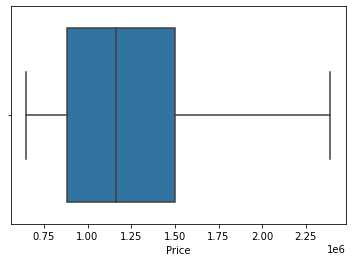

In [209]:
sns.boxplot(data5['Price'])

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Landsize'>

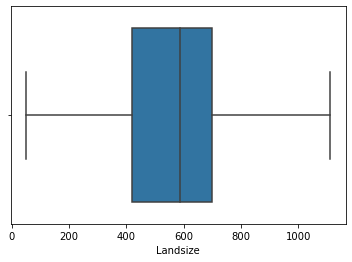

In [210]:
sns.boxplot(data5['Landsize'])

In [211]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16842 entries, 4 to 34852
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed        16842 non-null  int64         
 1   Suburb         16842 non-null  object        
 2   Address        16842 non-null  object        
 3   Price          16842 non-null  float64       
 4   Date           16842 non-null  datetime64[ns]
 5   Distance       16842 non-null  float64       
 6   Postcode       16842 non-null  float64       
 7   Bedroom        16842 non-null  float64       
 8   Bathroom       16842 non-null  float64       
 9   Car            16842 non-null  float64       
 10  Landsize       16842 non-null  float64       
 11  Buildingarea   16842 non-null  float64       
 12  CouncilArea    16842 non-null  object        
 13  Regionname     16842 non-null  object        
 14  Propertycount  16842 non-null  float64       
 15  num            1684

In [212]:
data5.to_excel('updatedmelbourne.xlsx')

In [213]:
x=data5.drop(['Price','Suburb','Address','CouncilArea','Regionname','Date'],axis=1)
y=data5['Price']

In [214]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)

In [215]:
from sklearn.linear_model import LinearRegression

In [216]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [217]:
y_pred.shape

(8421,)

In [218]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

train_score_lr = lr.score(x_train, y_train)
test_score_lr = lr.score(x_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

The train score for lr model is 0.5358824331688923
The test score for lr model is 0.5443387741537339


In [219]:
df_comp = pd.DataFrame({'Actual': np.round(y_test, 2), 
                   'Predicted': np.round(y_pred, 2)})
df_comp.head(10)

,Actual,Predicted
1964,1553302.58,1590578.13
1524,1131000.00,988613.05
15229,1210000.00,1267844.35
21777,1230000.00,1029457.22
13662,1150000.00,1424402.61
34118,790000.00,823513.07
30293,1439152.24,1512620.50
3697,990000.00,975053.62
32155,850000.00,966455.85
20491,1730000.00,1386942.16


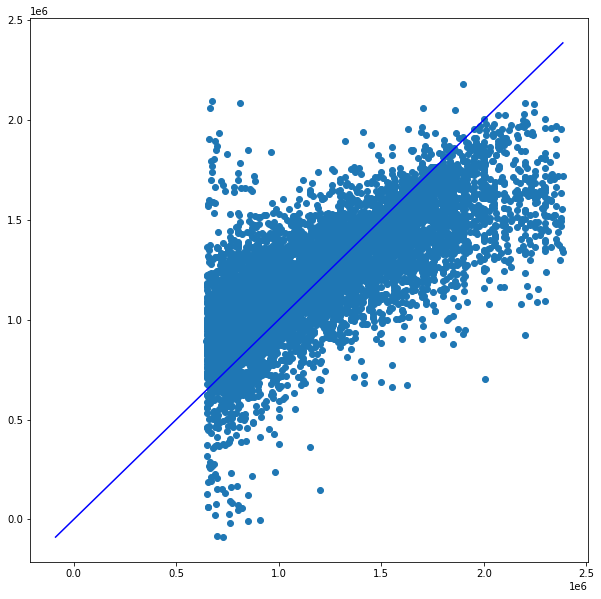

In [220]:
plt.figure(figsize=(10,10))
plt.scatter(df_comp['Actual'], df_comp['Predicted'])
p1 = max(max(df_comp['Predicted']), max(df_comp['Actual']))
p2 = min(min(df_comp['Predicted']), min(df_comp['Actual']))
plt.plot([p1, p2], [p1, p2], 'b-')

In [221]:
from sklearn.ensemble import RandomForestRegressor

In [222]:
data5

,Unnamed,Suburb,Address,Price,Date,Distance,Postcode,Bedroom,Bathroom,Car,...,Buildingarea,CouncilArea,Regionname,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
4,5,Abbotsford,5 Charles St,1.465000e+06,2017-04-03,2.5,3067.0,3.0,2.0,0.0,...,150.000000,Yarra City Council,Northern Metropolitan,4019.0,1,5,0,0,31,2
5,6,Abbotsford,40 Federation La,8.500000e+05,2017-04-03,2.5,3067.0,3.0,2.0,1.0,...,132.512823,Yarra City Council,Northern Metropolitan,4019.0,1,6,0,0,31,2
6,7,Abbotsford,55a Park St,1.600000e+06,2016-04-06,2.5,3067.0,3.0,1.0,2.0,...,142.000000,Yarra City Council,Northern Metropolitan,4019.0,1,7,0,0,31,2
7,8,Abbotsford,16 Maugie St,1.759245e+06,2016-06-08,2.5,3067.0,3.0,2.0,2.0,...,220.000000,Yarra City Council,Northern Metropolitan,4019.0,1,8,0,0,31,2
11,12,Abbotsford,124 Yarra St,1.876000e+06,2016-07-05,2.5,3067.0,4.0,2.0,0.0,...,210.000000,Yarra City Council,Northern Metropolitan,4019.0,1,12,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,34851,Wollert,15 Rockgarden Wy,1.238190e+06,2018-02-24,25.5,3750.0,3.0,2.0,2.0,...,135.000000,Whittlesea City Council,Northern Metropolitan,2940.0,1,34851,343,0,29,2
34848,34852,Yarraville,78 Bayview Rd,1.101000e+06,2018-02-24,6.3,3013.0,3.0,1.0,2.0,...,115.331975,Maribyrnong City Council,Western Metropolitan,6543.0,1,34852,348,0,16,6
34849,34853,Yarraville,13 Burns St,1.480000e+06,2018-02-24,6.3,3013.0,4.0,1.0,3.0,...,176.535100,Maribyrnong City Council,Western Metropolitan,6543.0,1,34853,348,0,16,6
34851,34855,Yarraville,147A Severn St,7.050000e+05,2018-02-24,6.3,3013.0,2.0,1.0,2.0,...,120.000000,Maribyrnong City Council,Western Metropolitan,6543.0,1,34855,348,1,16,6


In [223]:
X=data5.drop(['Price','Suburb','Address','CouncilArea','Regionname','Date'],axis=1)
y=data5['Price']

In [224]:
X

,Unnamed,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,Buildingarea,Propertycount,num,ID,u_suburb,u_Type,u_CouncilArea,u_Regionname
4,5,2.5,3067.0,3.0,2.0,0.0,134.000000,150.000000,4019.0,1,5,0,0,31,2
5,6,2.5,3067.0,3.0,2.0,1.0,94.000000,132.512823,4019.0,1,6,0,0,31,2
6,7,2.5,3067.0,3.0,1.0,2.0,120.000000,142.000000,4019.0,1,7,0,0,31,2
7,8,2.5,3067.0,3.0,2.0,2.0,400.000000,220.000000,4019.0,1,8,0,0,31,2
11,12,2.5,3067.0,4.0,2.0,0.0,245.000000,210.000000,4019.0,1,12,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,34851,25.5,3750.0,3.0,2.0,2.0,268.000000,135.000000,2940.0,1,34851,343,0,29,2
34848,34852,6.3,3013.0,3.0,1.0,2.0,288.000000,115.331975,6543.0,1,34852,348,0,16,6
34849,34853,6.3,3013.0,4.0,1.0,3.0,593.000000,176.535100,6543.0,1,34853,348,0,16,6
34851,34855,6.3,3013.0,2.0,1.0,2.0,220.000000,120.000000,6543.0,1,34855,348,1,16,6


In [225]:
y

4        1.465000e+06
5        8.500000e+05
6        1.600000e+06
7        1.759245e+06
11       1.876000e+06
             ...     
34847    1.238190e+06
34848    1.101000e+06
34849    1.480000e+06
34851    7.050000e+05
34852    1.140000e+06
Name: Price, Length: 16842, dtype: float64

In [226]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state = 42)

In [227]:
rf = RandomForestRegressor(n_estimators = 4000, random_state = 42)

In [228]:
rf.fit(X, y)

RandomForestRegressor(n_estimators=4000, random_state=42)

In [229]:
predictions = rf.predict(x_test)

In [230]:
predictions

array([ 766394.38999478,  956216.29342301, 1747396.6859184 , ...,
       1662442.01455482, 1544104.56091457, 1212494.9345886 ])